In [1]:
#Import necessary liabraris
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# READING THE DATASET
ap_data = pd.read_csv('application_data.csv',encoding='ISO-8859-1')
column_data= pd.read_csv('columns_description.csv',encoding = 'ISO-8859-1')
pre_data= pd.read_csv('previous_application.csv', encoding ='ISO-8859-1')

In [5]:
#show the number of rows and columns
ap_data.shape

(307511, 122)

In [7]:
#Brief description about dataset
ap_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [9]:
#Overview of dataset with some metrics like mean,std,max,min,var etc.
ap_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [11]:
ap_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
ap_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

### Handling the missing value

In [16]:
#Find the percentage i.e mean of missing value in all columns
(round(ap_data.isnull().mean(),2)*100).sort_values(ascending = False)

COMMONAREA_MODE             70.0
COMMONAREA_AVG              70.0
COMMONAREA_MEDI             70.0
NONLIVINGAPARTMENTS_MODE    69.0
NONLIVINGAPARTMENTS_AVG     69.0
                            ... 
NAME_EDUCATION_TYPE          0.0
NAME_INCOME_TYPE             0.0
NAME_TYPE_SUITE              0.0
AMT_GOODS_PRICE              0.0
SK_ID_CURR                   0.0
Length: 122, dtype: float64

In [18]:
#Consider columns only with < 50 % of missing values for analysis
data = (round(ap_data.isnull().mean(),2)*100).sort_values(ascending = False)
newap_data = ap_data.loc[:, data < 50]
newap_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# Convert the values in the 'DAYS_BIRTH' column from days to years and display the first few rows
newap_data['DAYS_BIRTH'] = -round(newap_data['DAYS_BIRTH'] / 365,0)
newap_data['DAYS_BIRTH'].head()

0    26.0
1    46.0
2    52.0
3    52.0
4    55.0
Name: DAYS_BIRTH, dtype: float64

In [22]:
# Convert the value in the 'DAYS_REGISTRATION' column from days to years and display the first few rows
newap_data['DAYS_REGISTRATION']= -round(newap_data['DAYS_REGISTRATION']/ 365,0)
newap_data['DAYS_REGISTRATION'].head()

0    10.0
1     3.0
2    12.0
3    27.0
4    12.0
Name: DAYS_REGISTRATION, dtype: float64

In [24]:
# Convert the values in the 'DAYS_ID_PUBLISH' column from days to years and display the  first few rows
newap_data['DAYS_ID_PUBLISH'] = -round(newap_data['DAYS_ID_PUBLISH']/365,0)
newap_data['DAYS_ID_PUBLISH'].head()

0    6.0
1    1.0
2    7.0
3    7.0
4    9.0
Name: DAYS_ID_PUBLISH, dtype: float64

##  Classify categorical and numerical columns

In [27]:
newap_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 78 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [31]:
cat_cols = newap_data.select_dtypes(include='object')
num_cols = newap_data.select_dtypes(exclude ='object')

In [33]:
# List of categorical column
cat_cols.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'EMERGENCYSTATE_MODE'],
      dtype='object')

In [35]:
num_cols.columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI',
       'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2',
       'FLAG_D

In [37]:
# Drop 'SK_ID_CURR'  column as the colun contains 'ID of loan in our dataframe'
num_cols.drop(columns = ['SK_ID_CURR'],inplace=True)

In [39]:
num_cols.columns

Index(['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI',
       'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOC

In [41]:
#Move 'TARGET' column to categorial columns as this column shows data about loan repayment difficulty of customers
# has two values only as 0 or 1, so can't be treated as numerical column.

target = num_cols.pop('TARGET')
cat_cols['TARGET'] = target

# Univariate analysis of categorical columns

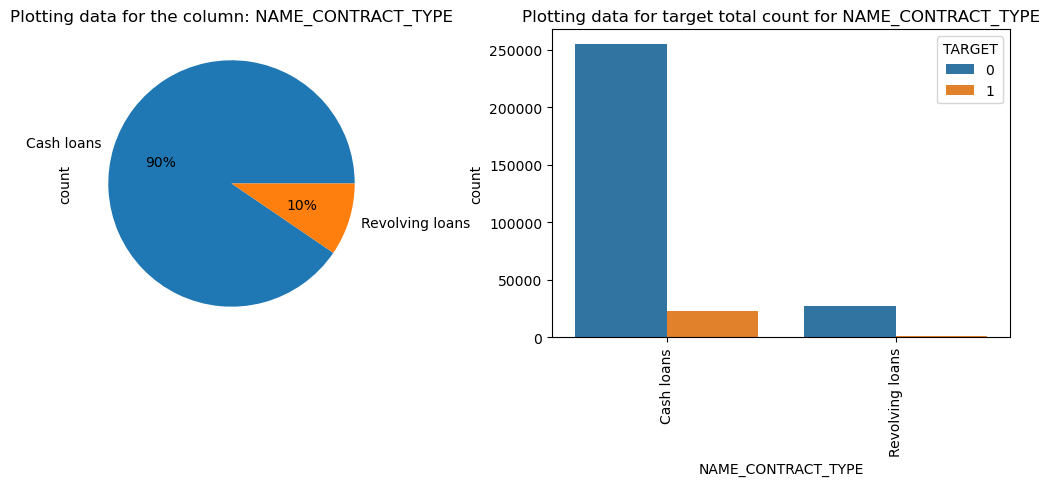

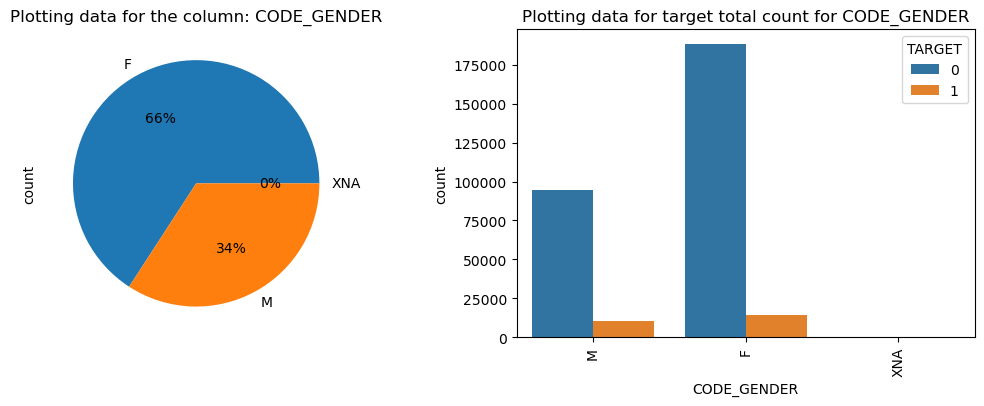

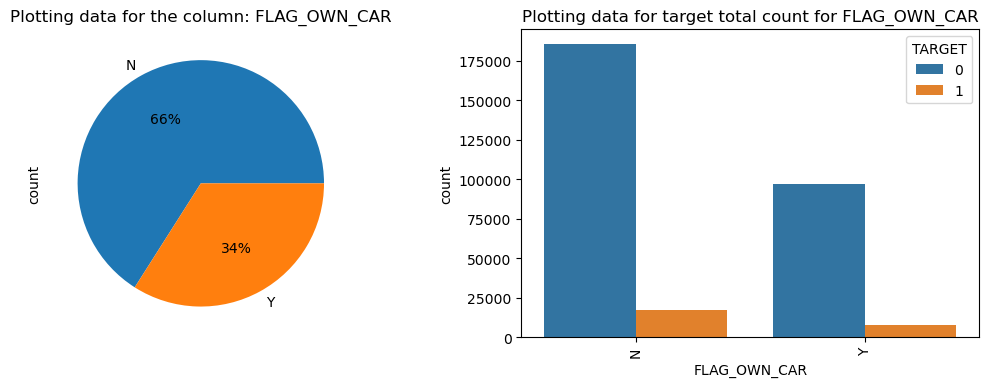

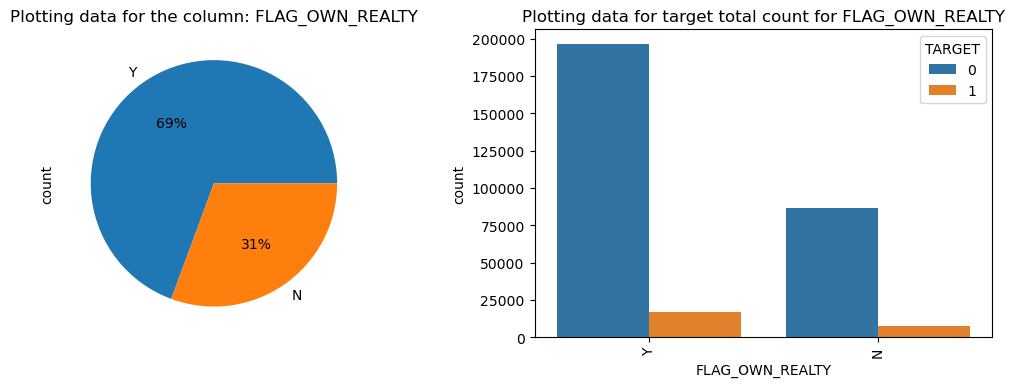

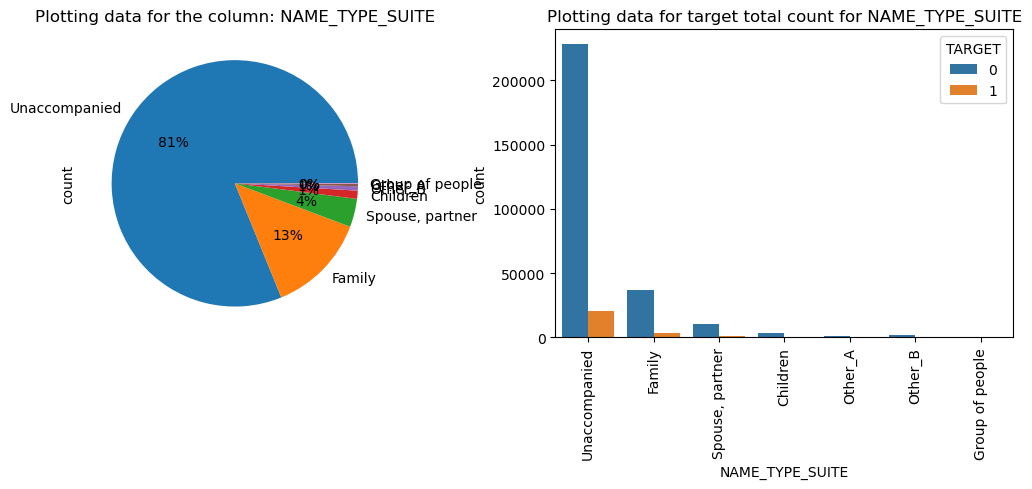

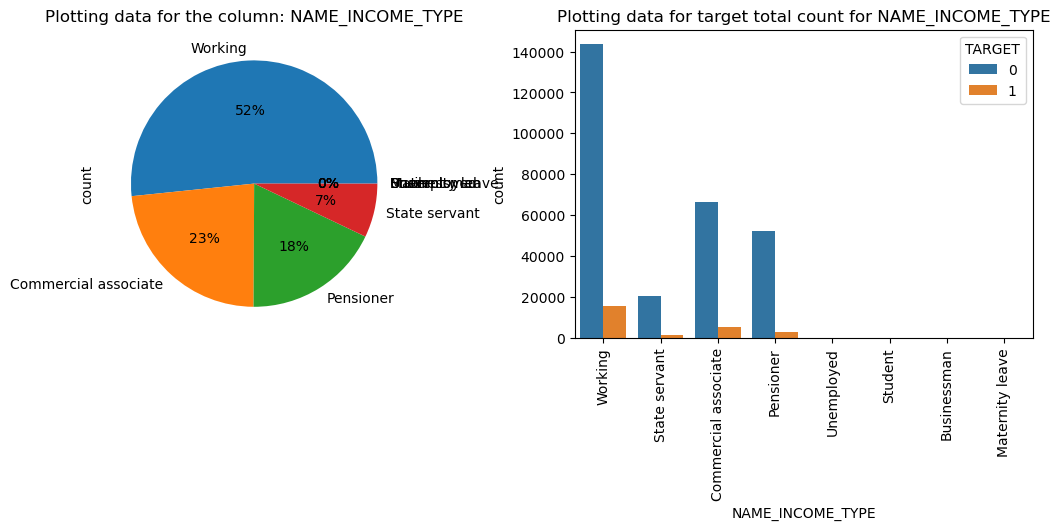

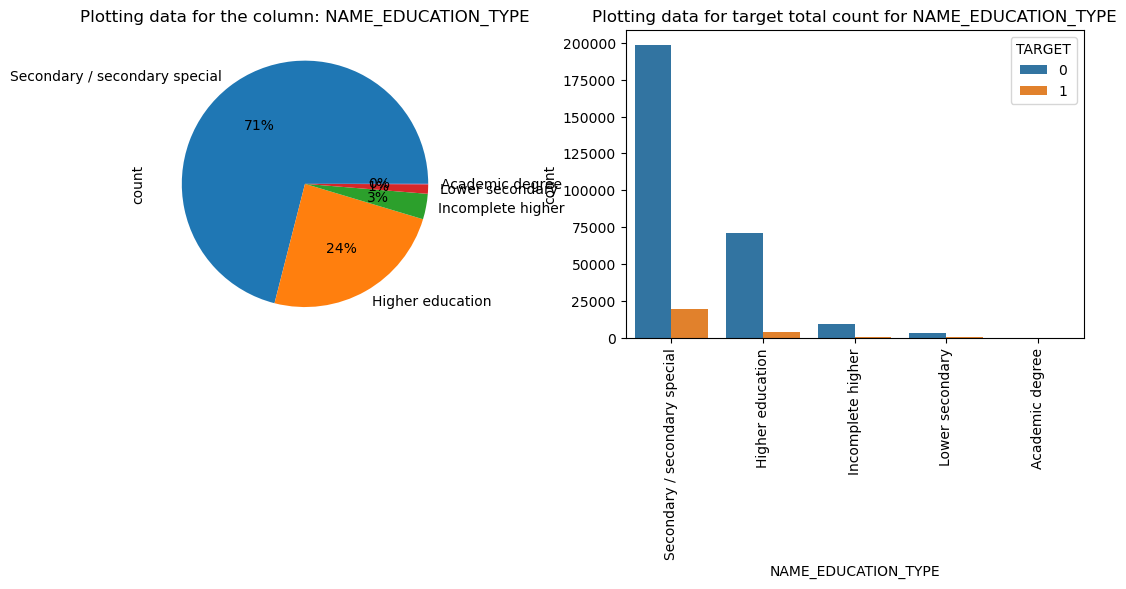

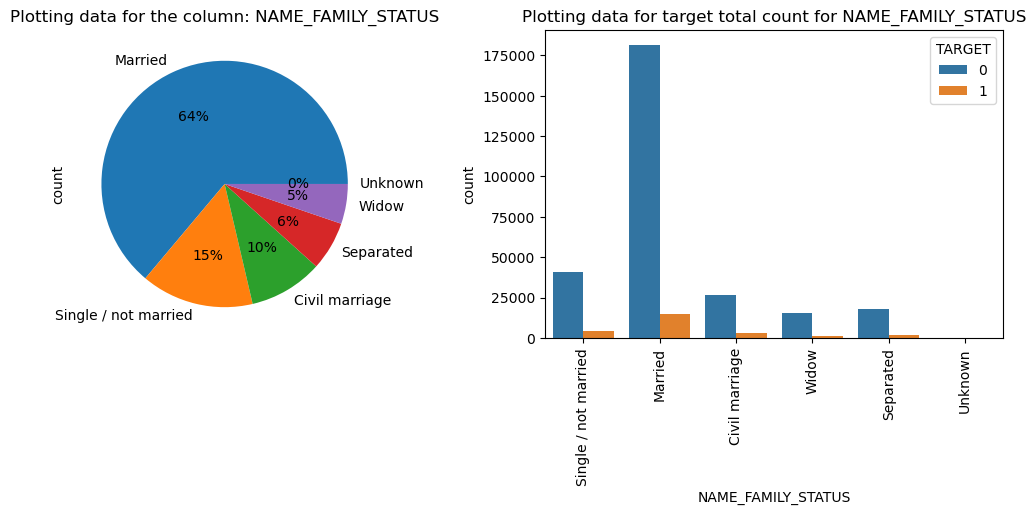

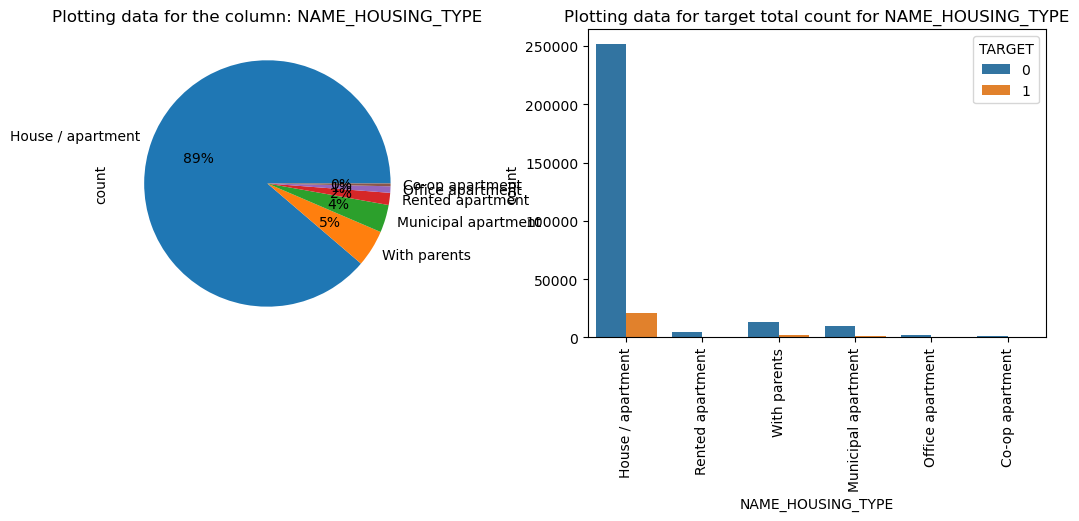

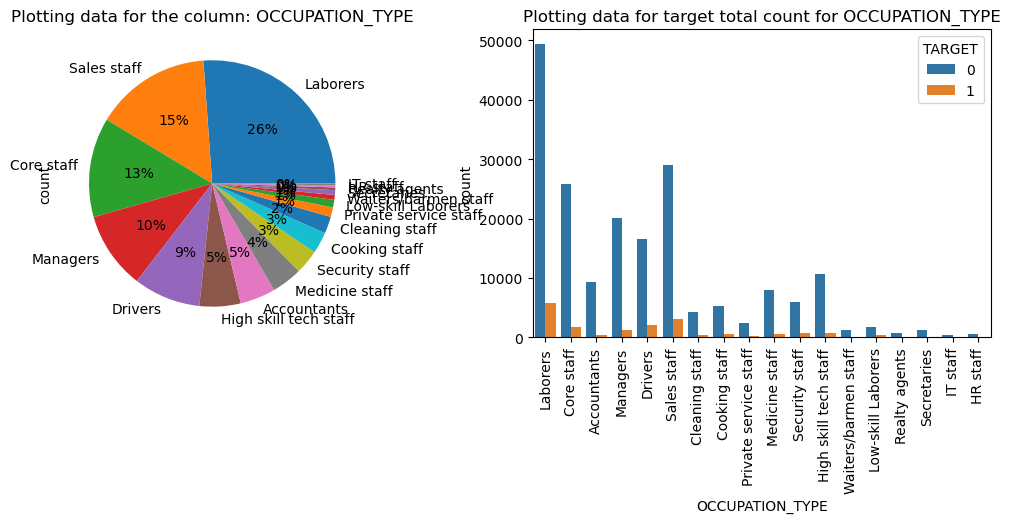

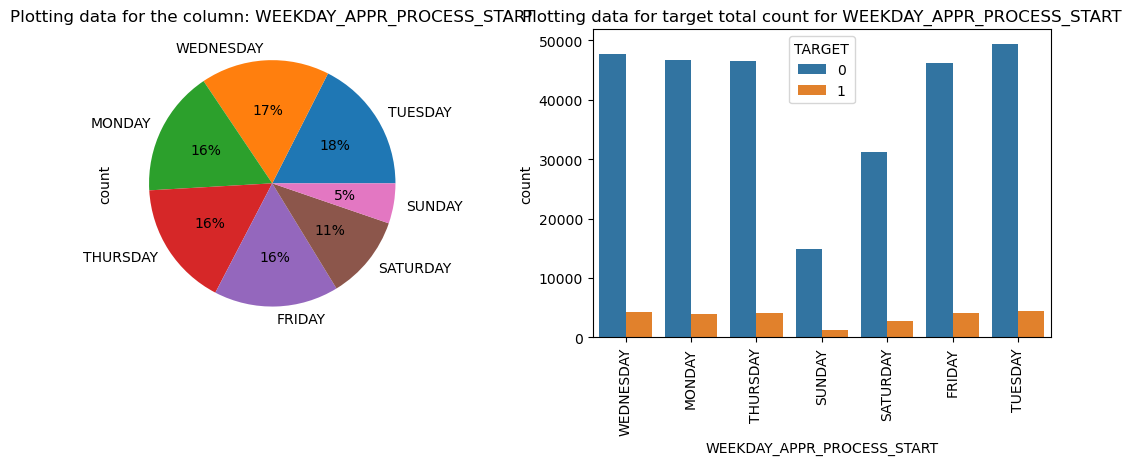

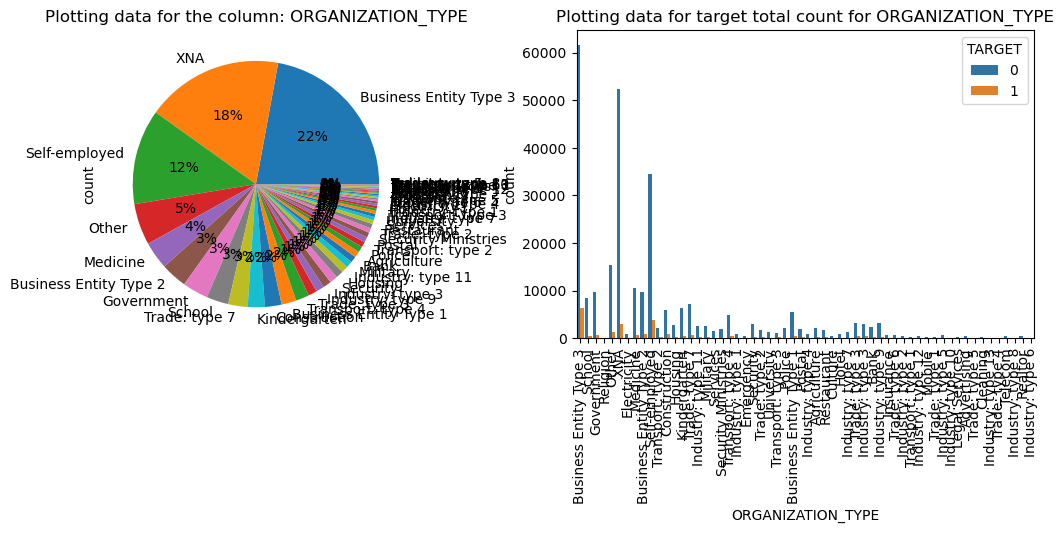

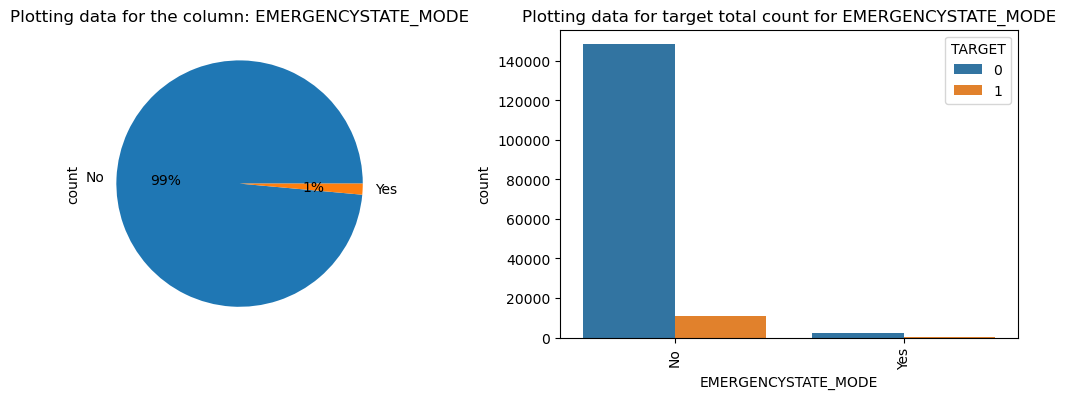

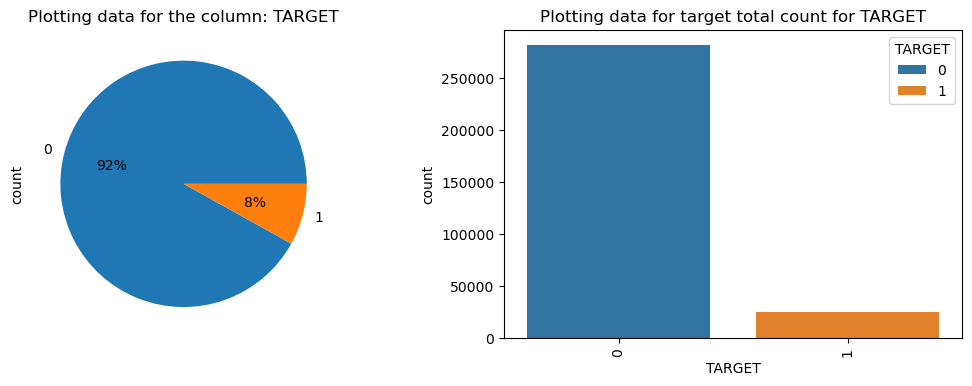

In [48]:
# Plot pie chart and count plot for all the categorical columns to analyse

for col in cat_cols:

    plt.figure(figsize=(13,4))
    # Create a subplot for the pie chart
    ax1 = plt.subplot(121)
    # Plotting pie chart for overall distribution of the column
    cat_cols[col].value_counts().plot.pie(autopct="%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: ' + col)
    
    # Create a subplot for the countplot
    ax2 = plt.subplot(122)
    # Plotting count plot by category with hue as TARGET
    sns.countplot(x=col, hue='TARGET', data=cat_cols, ax=ax2)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target total count for '+ col)
    plt.show()


Take, for instance, the column "NAME_CONTRACT_TYPE". The visualisations produced offer insightful data distributions:

Pie Chart (First Plot):        

It reveals that 90% of the entries are 'Cash loans', while the remaining 10% are 'Revolving loans'. This chart provides a straightforward view          of the overall category proportions within the colu    mn.
Count Plot (Second Plo        t):

This visualization differentiates between 'Cash loans' and 'Revolving loans' based on the TARGET variable. For TARGET=0 (no default), the            re are approximately 250,000 'Cash loans' and around 2,500 'Revolving loans'. The plot offers a similar breakdown for TARGET=1 (default), enab             ling a comparison of counts between the two TARGET catego        ries.

The analysis identifies several key variables that significantly influence loan behavior and default rates:

COD    E_GENDER:

Although loans are less frequently taken by males, the data indicates that the proportion of male defaulters is notably higher compared     to females. This suggests gender as a potential factor in assessin    g loan risk.
NAME_    INCOME_TYPE:

Pensioners show a lower default rate, implying that despite a potentially fixed or lower income, they maintain a higher reliabil        ity in  repaying loans.
NAME_    EDUCATION_TYPE:

Loans are predominantly sought for secondary education, followed by higher education. However, the default rate among borrow         ers with secondary education is substantially higher than those with higher education credentials. This points to education level as a significant d    eterminant of loan repayment capacity.
N    AME_FAMILY_STATUS:

Married individuals are the most common applicants for loans and tend to have lower default rates. In contrast, singl             es and those in civil marriages exhibit higher default rates, highlighting the influence of marital status on loan repayment behavi    or.
OCCUPATION_TYPE:

Laborers and various staff categories are the most frequent loan applicants, yet managers and high-skilled tech staff prove     to be the most reliable in terms of repayment. This underscores the role of occupation type in predicting loan default risk.

# Converting a numerial data to categorical for analysis

<Axes: xlabel='AMT_ANNUITY', ylabel='Density'>

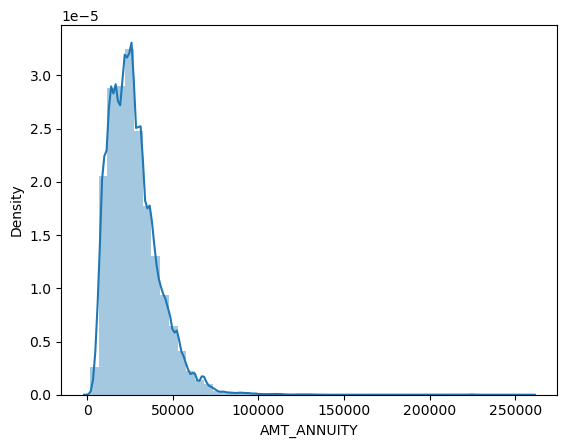

In [54]:
# Plot a distribution plot for the 'AMT_ANNUITY' column after removing any missing values
sns.distplot(num_cols['AMT_ANNUITY'].dropna())

In [56]:
def amt_annuity(x):
    if x <= 20000:
        return 'low'
    elif x > 20000 and x <= 50000:
        return 'medium'
    elif x > 50000 and x <= 100000:
        return 'high'
    else:
        return 'very high'

# Apply the 'amt_annuity' function to create a new categorical column 'amt_annuity_categorical'
cat_cols['amt_annuity'] = num_cols['AMT_ANNUITY'].apply(lambda x: amt_annuity(x))

In [58]:
cat_cols['amt_annuity'].value_counts()

amt_annuity
medium       179697
low          106505
high          20792
very high       517
Name: count, dtype: int64

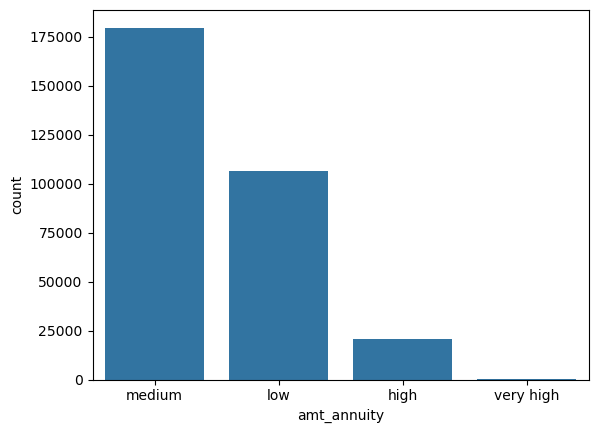

In [62]:
# Plot a count plot of the 'amt_annuity_categorical' column
sns.countplot(x='amt_annuity', data=cat_cols)
plt.show()

## Univariate Analysis for Numerical data

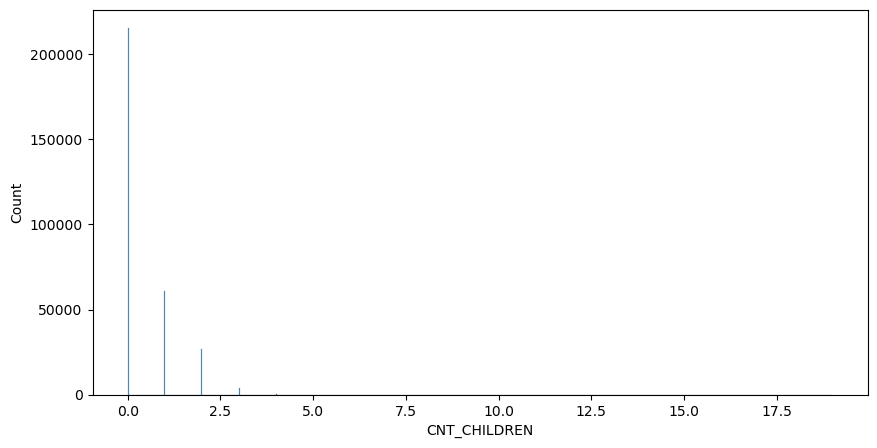

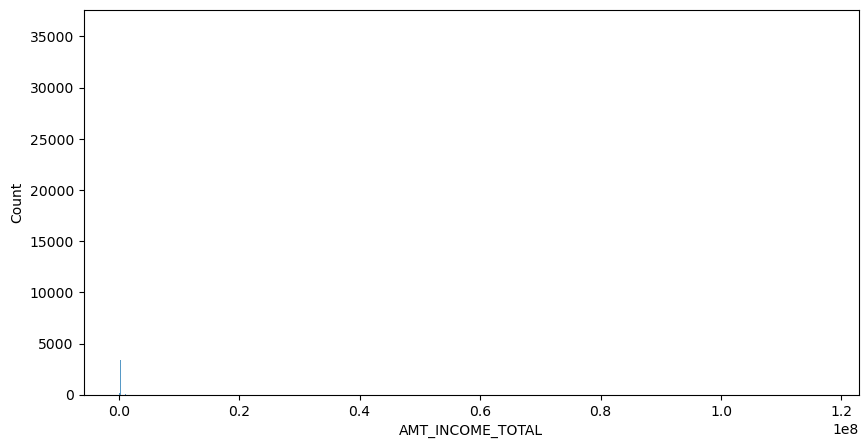

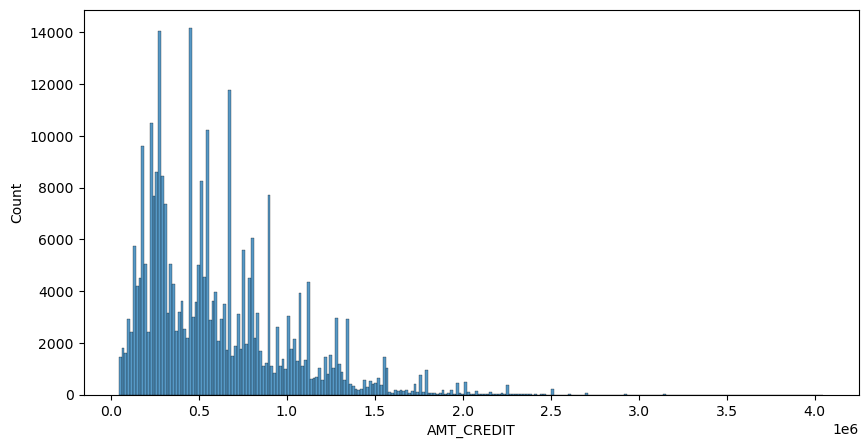

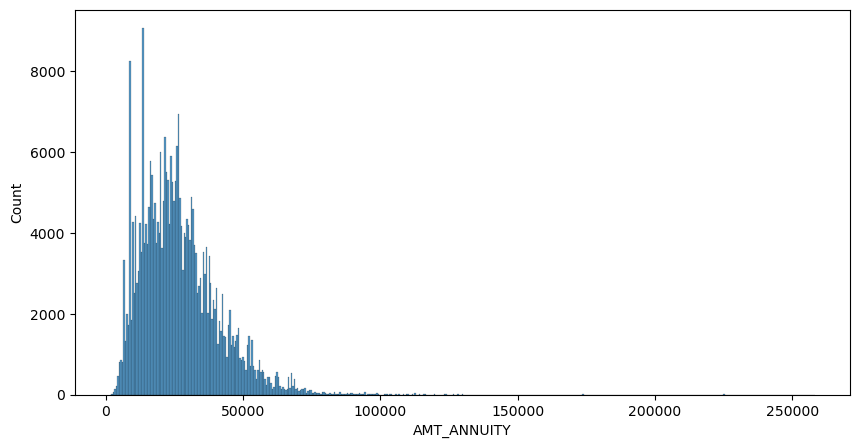

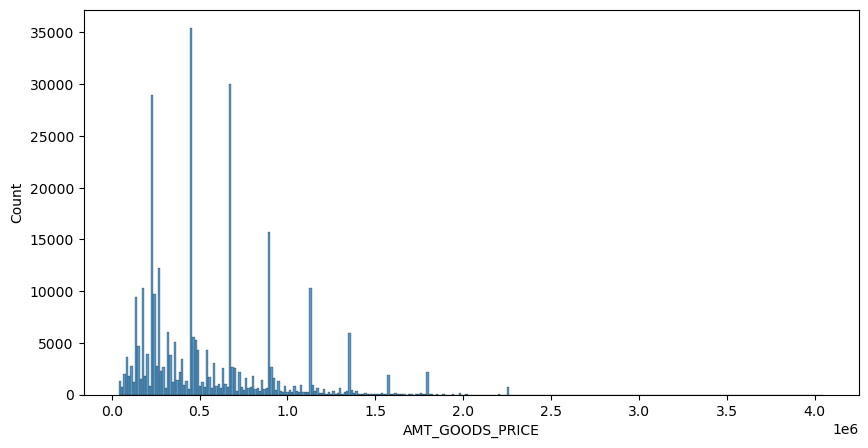

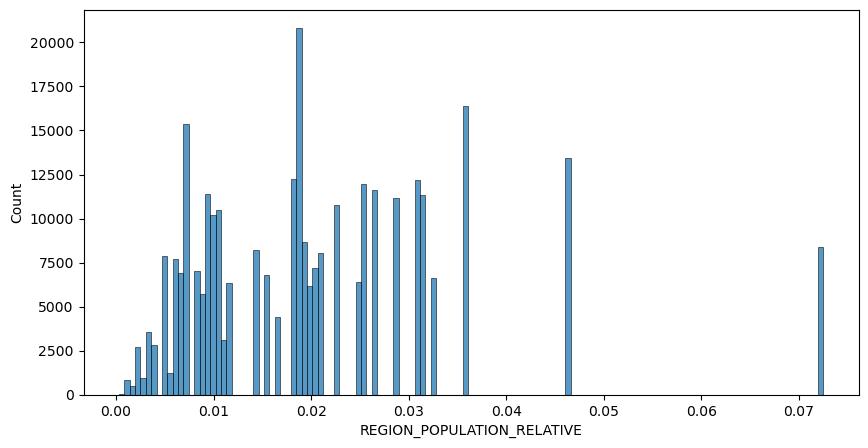

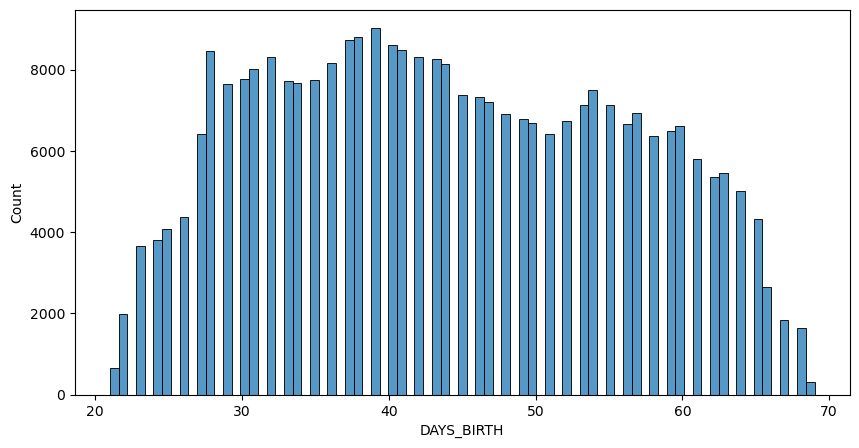

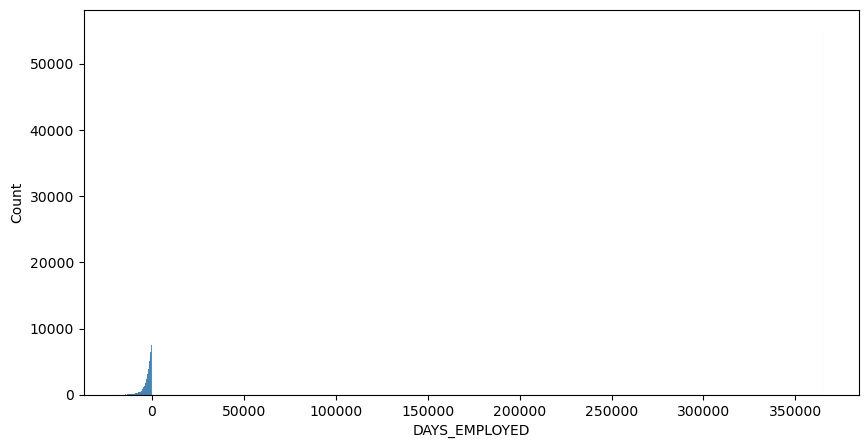

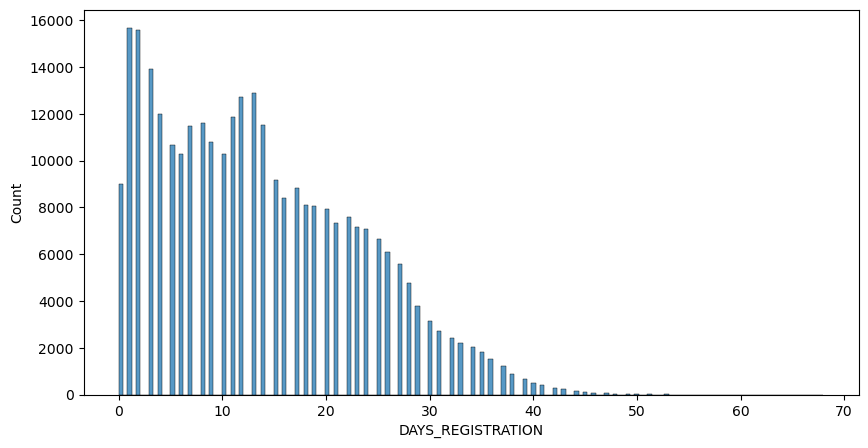

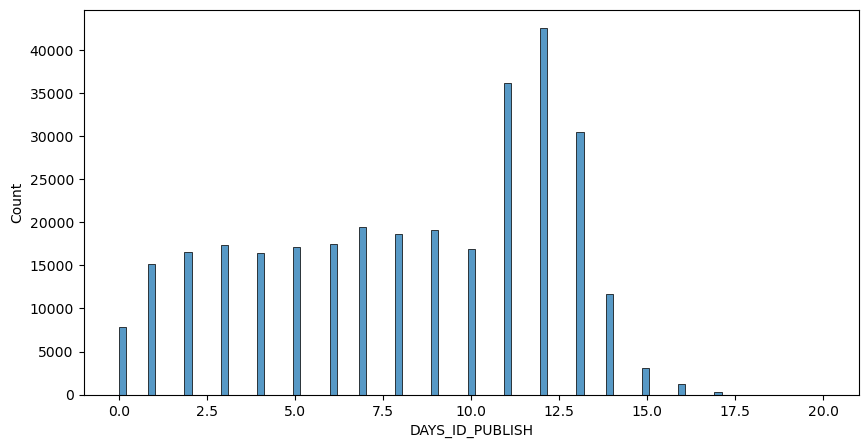

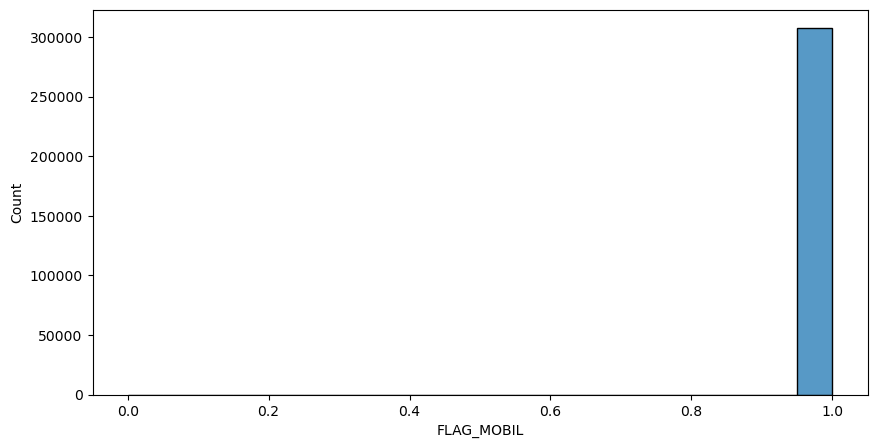

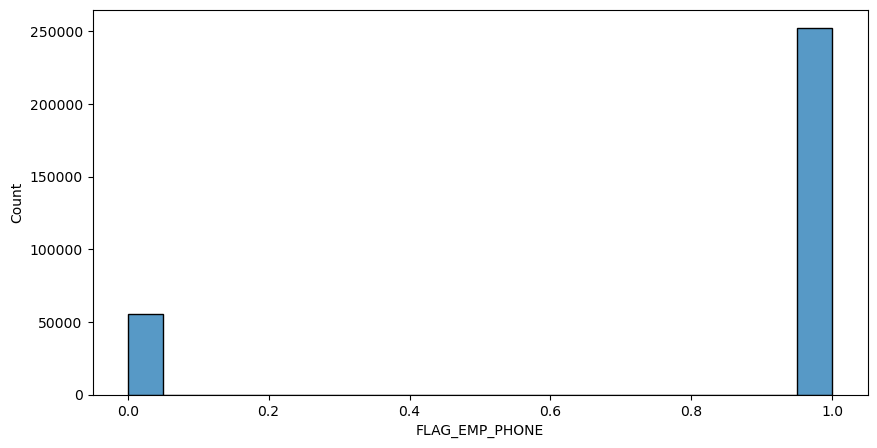

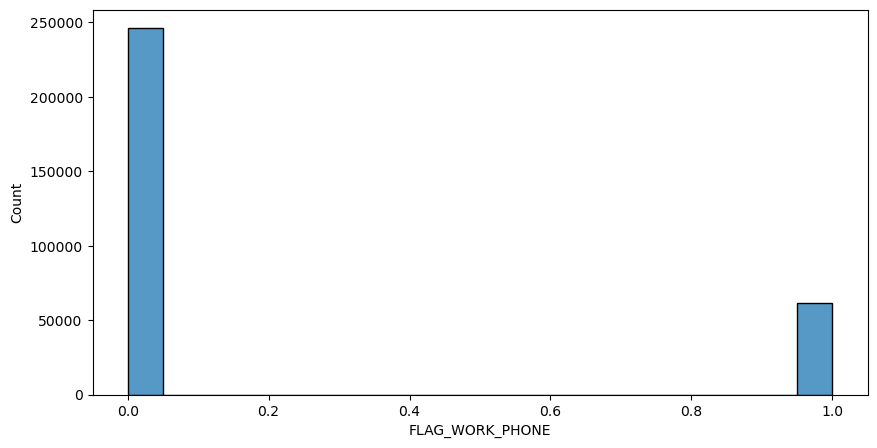

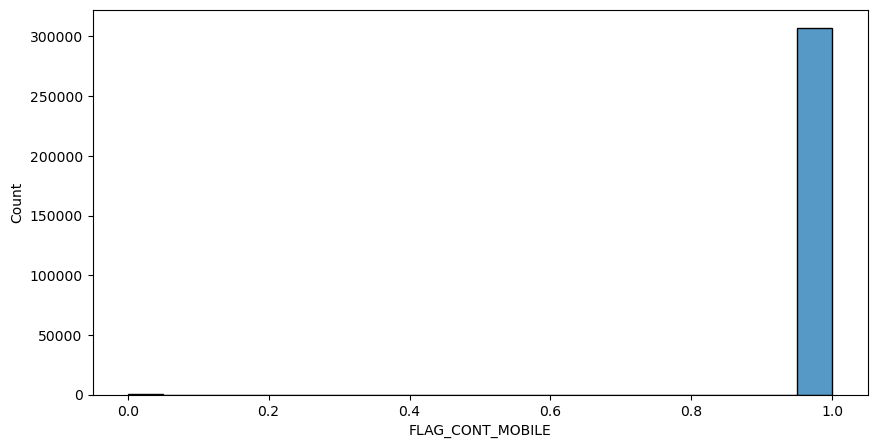

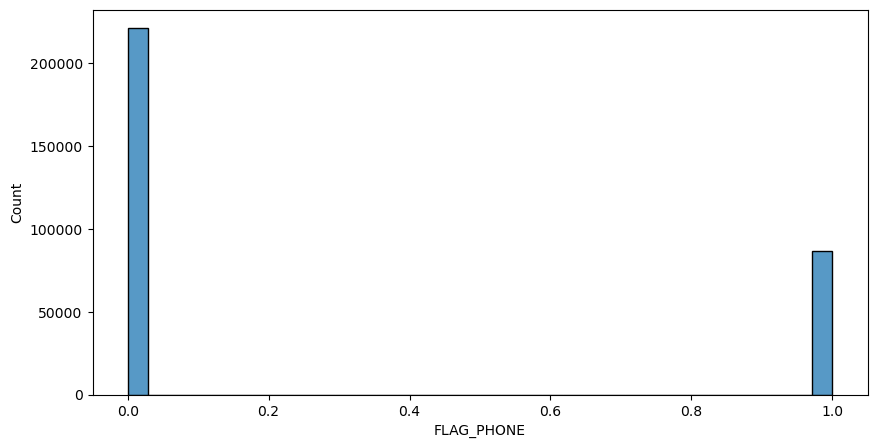

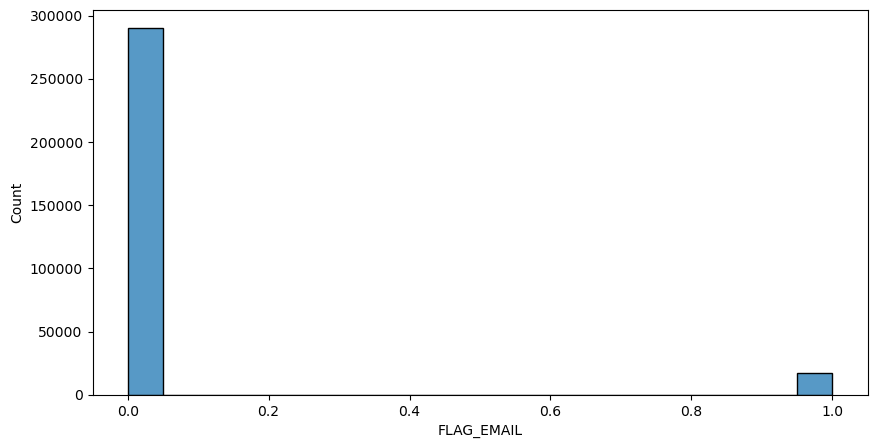

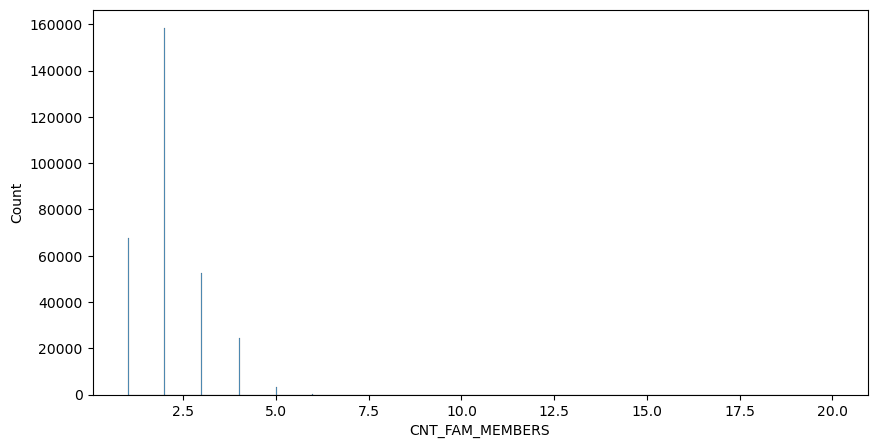

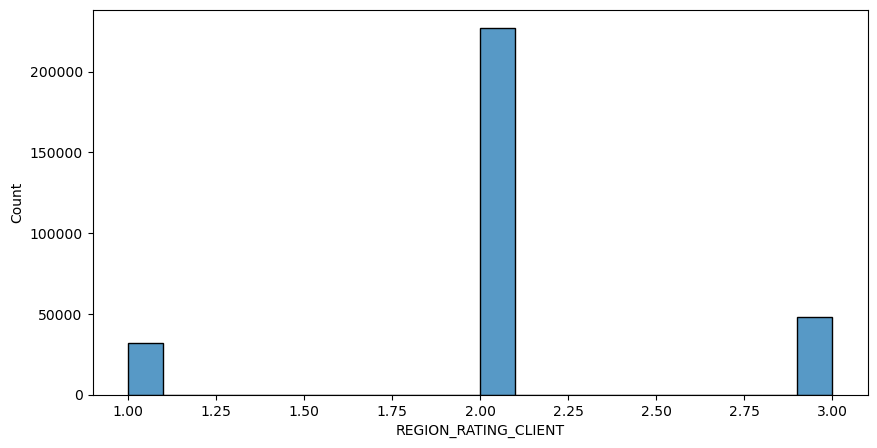

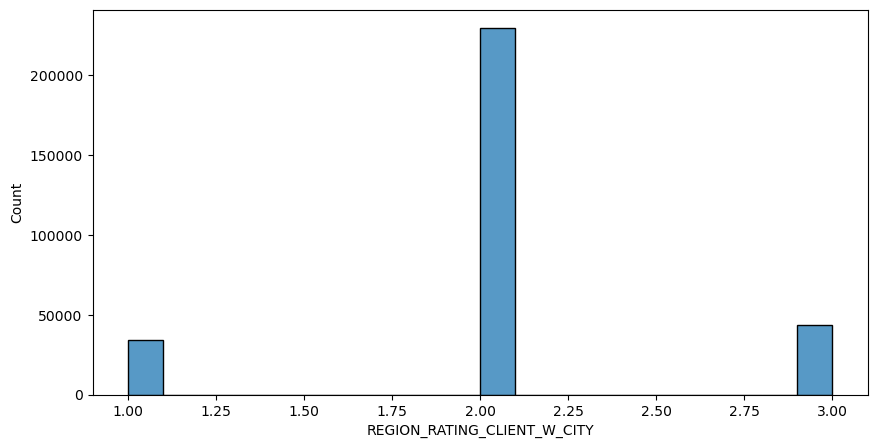

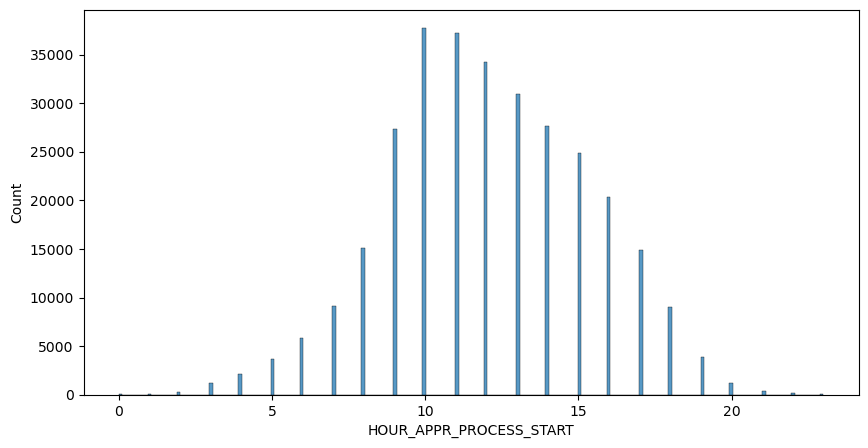

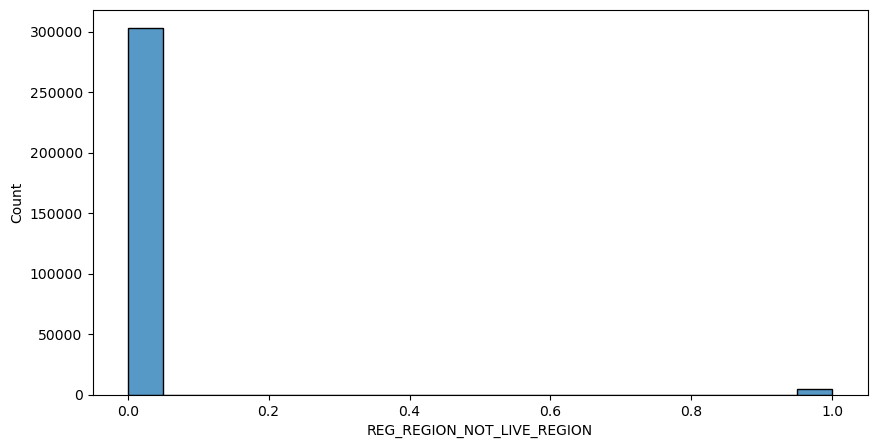

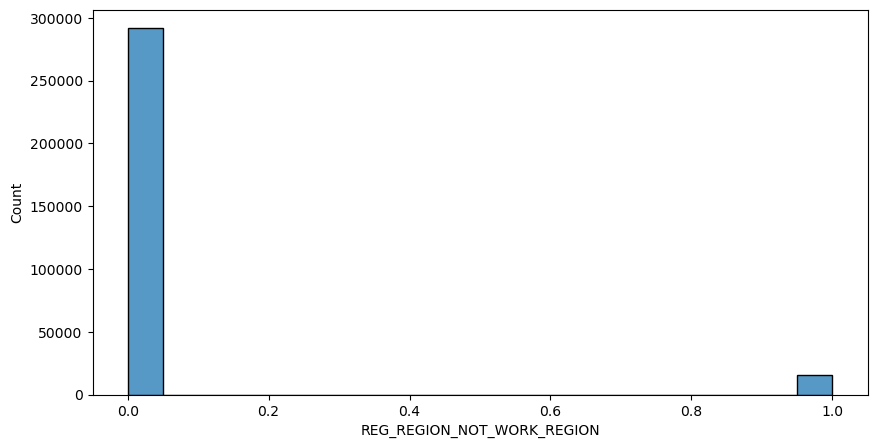

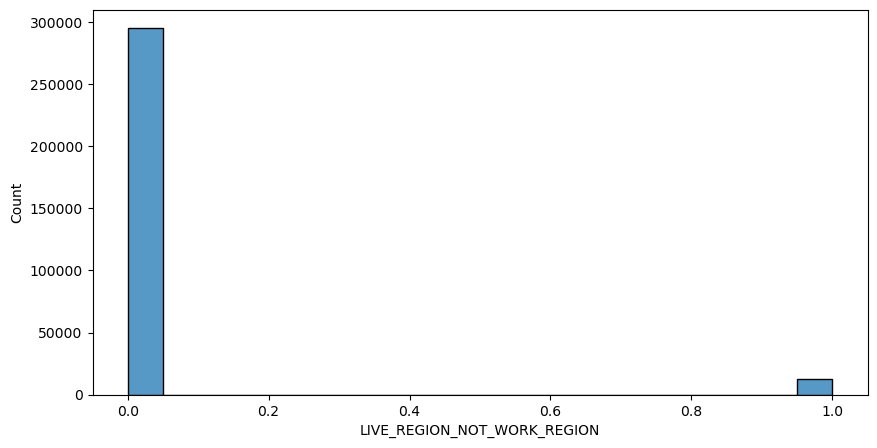

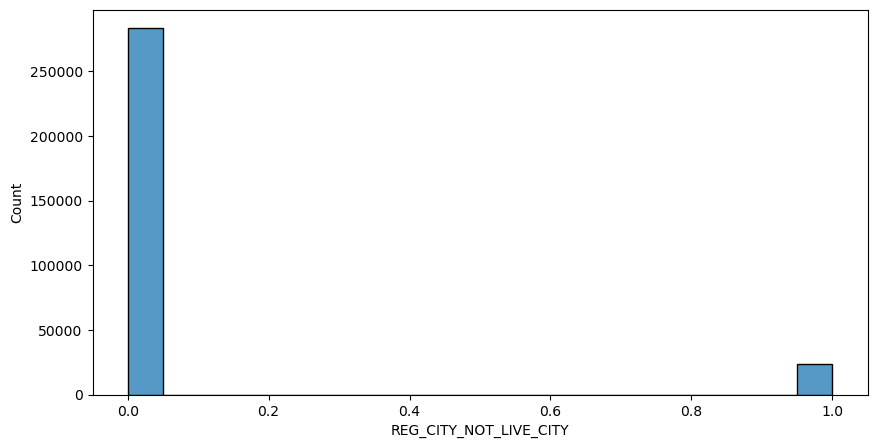

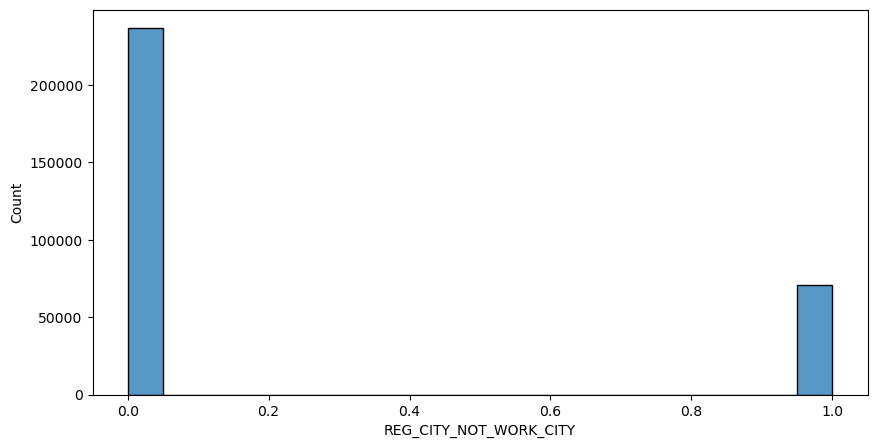

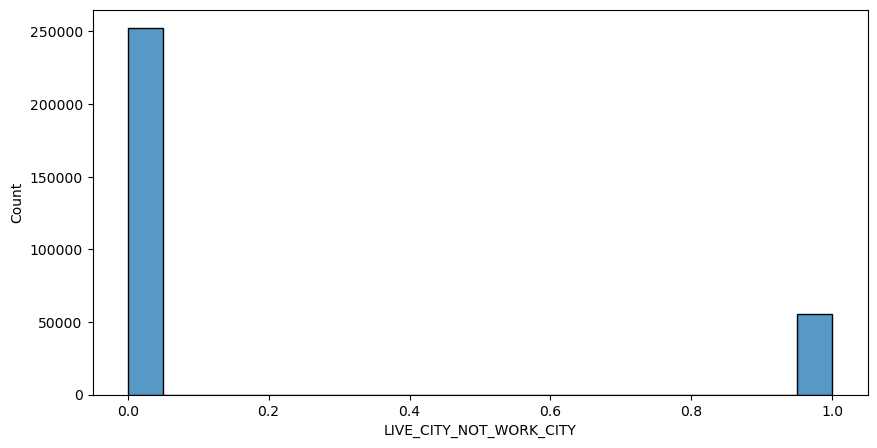

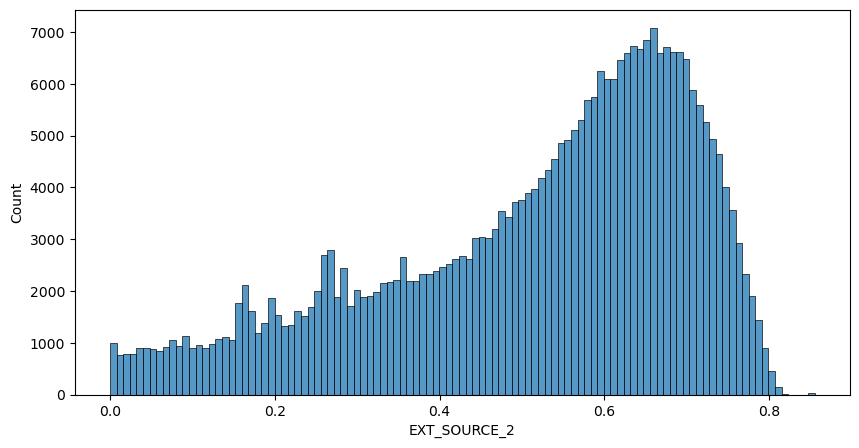

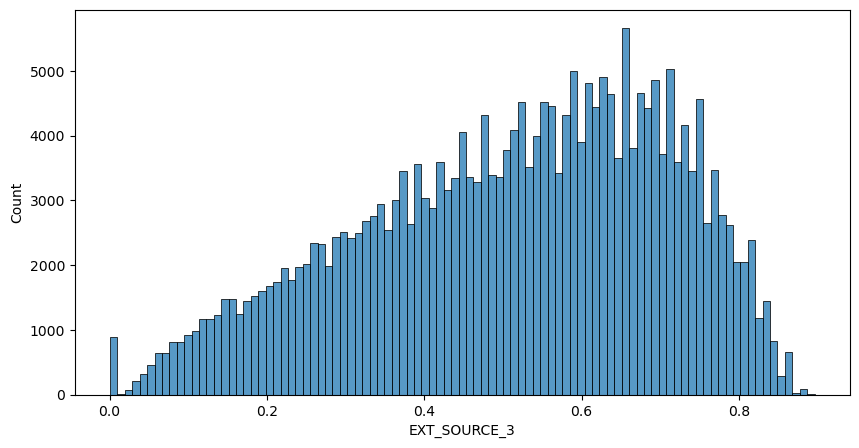

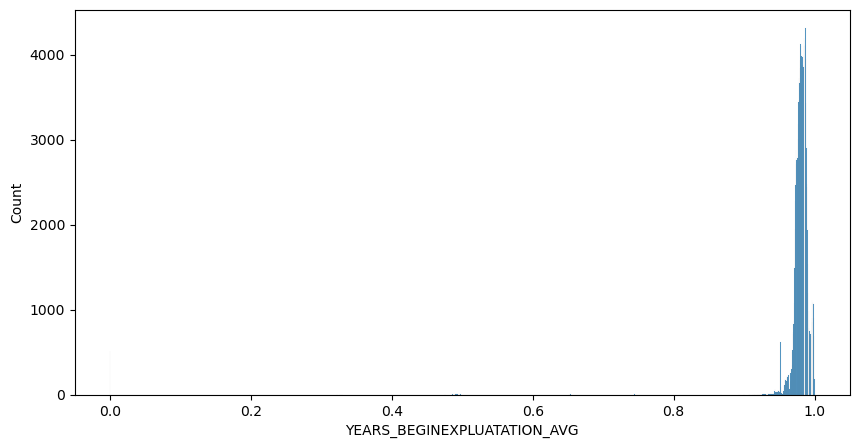

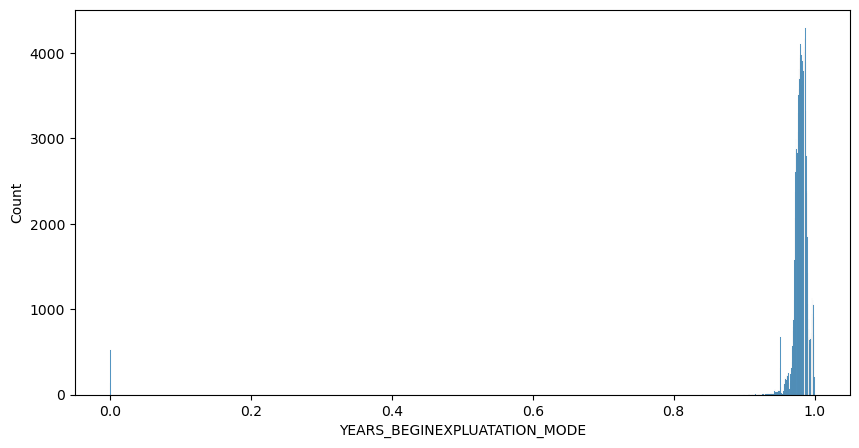

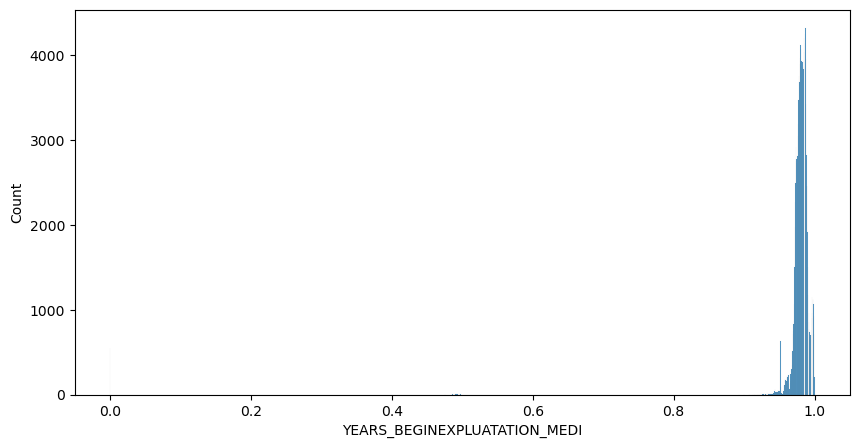

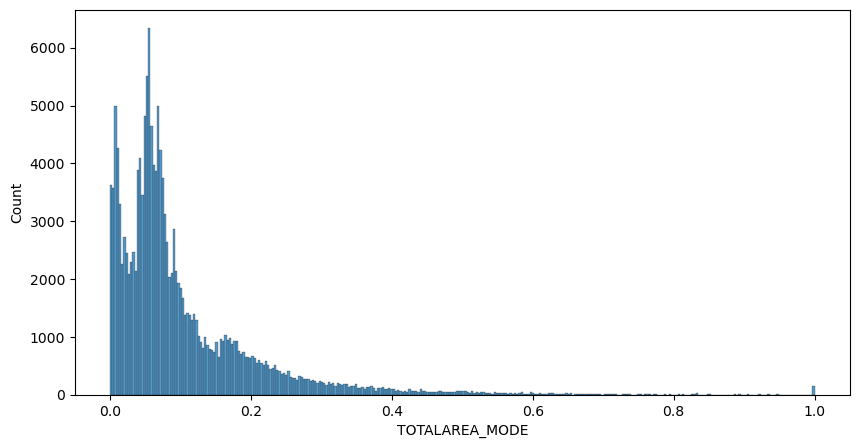

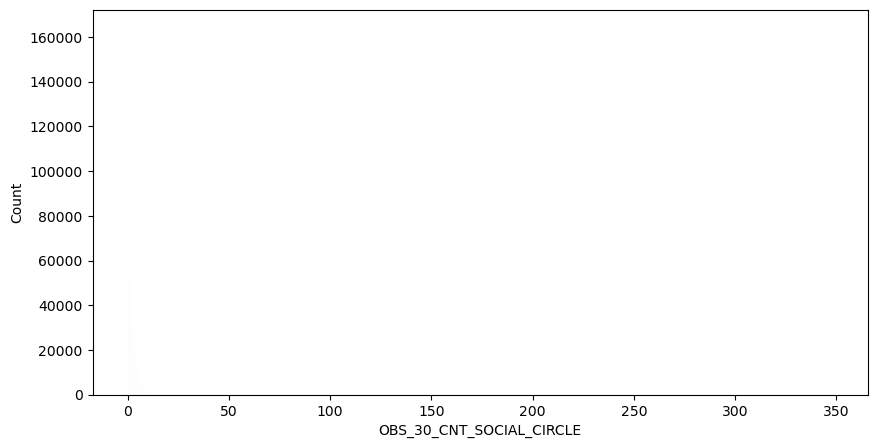

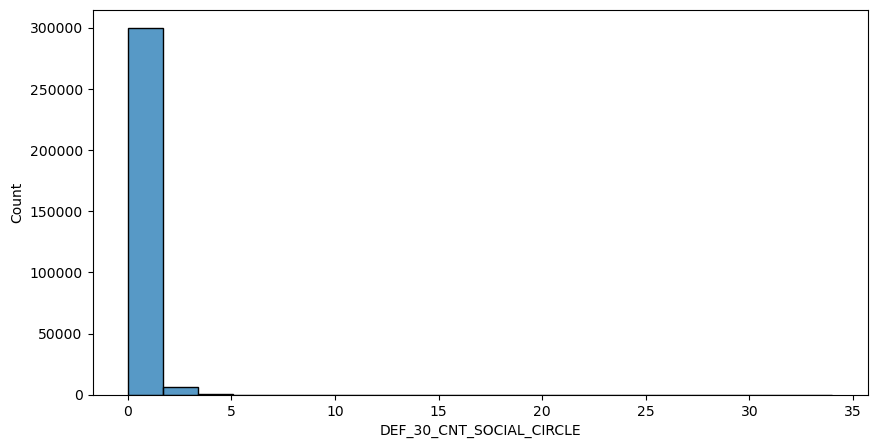

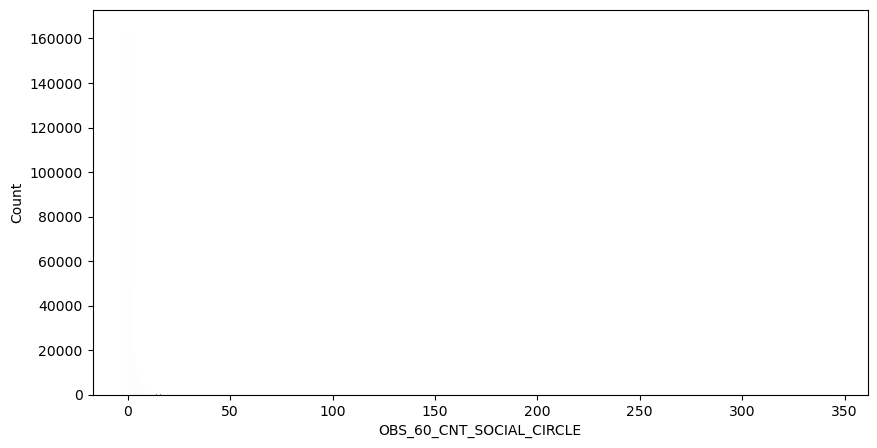

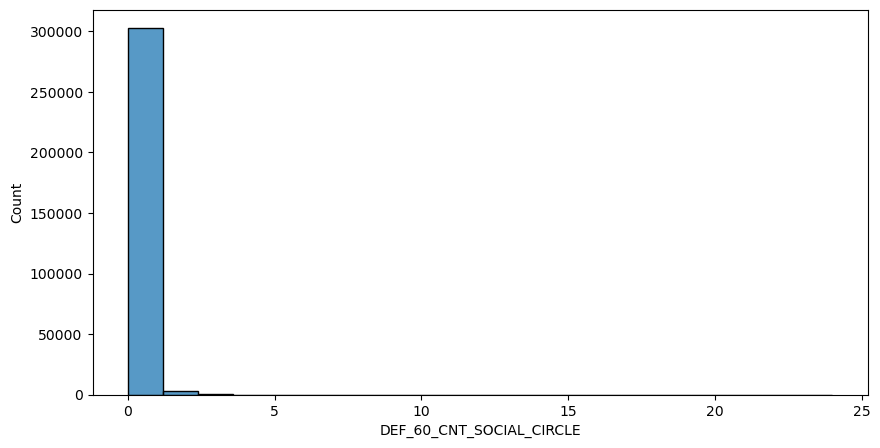

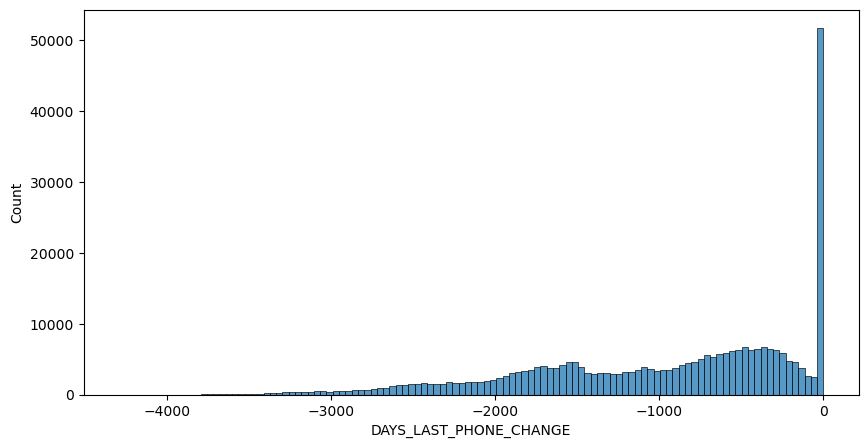

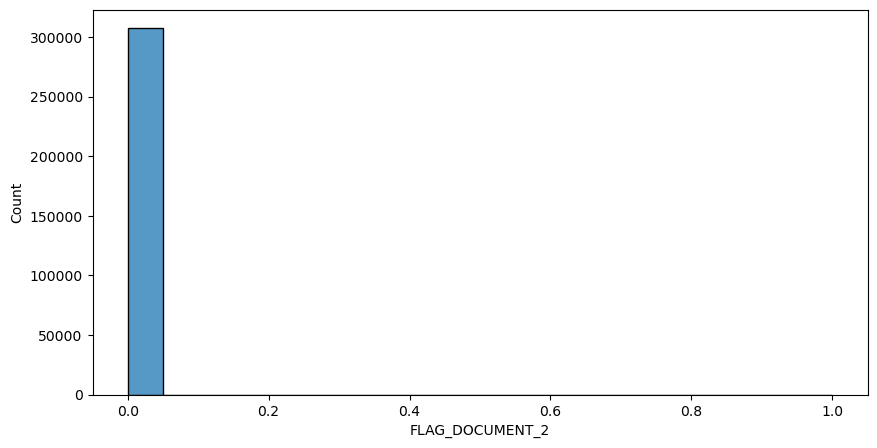

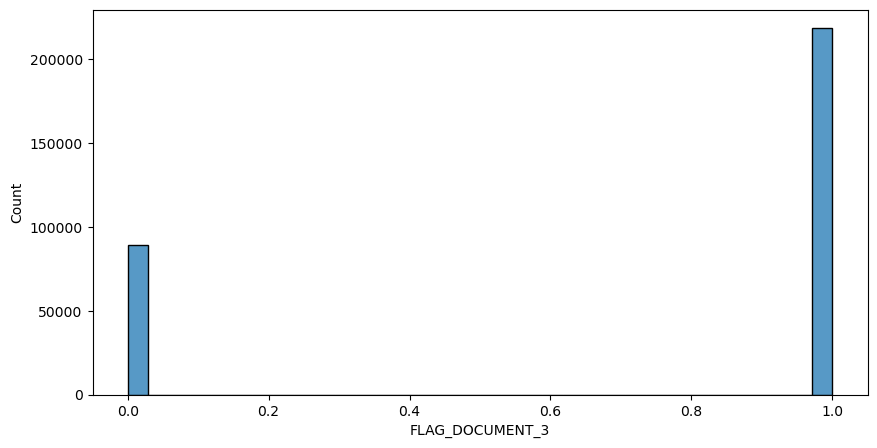

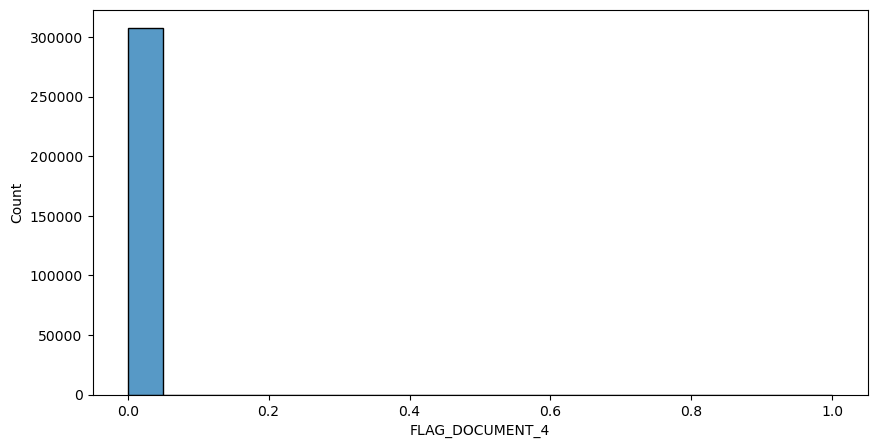

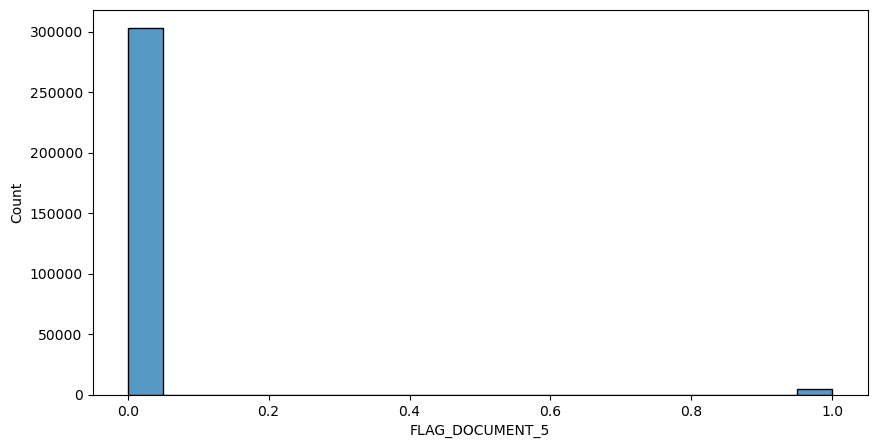

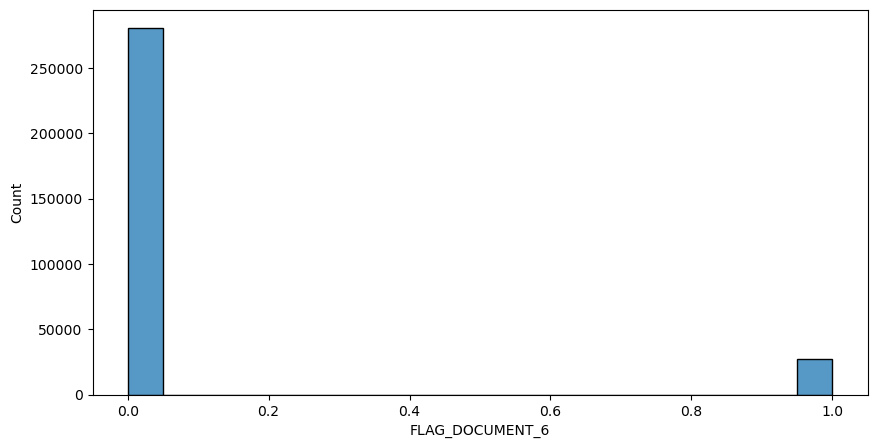

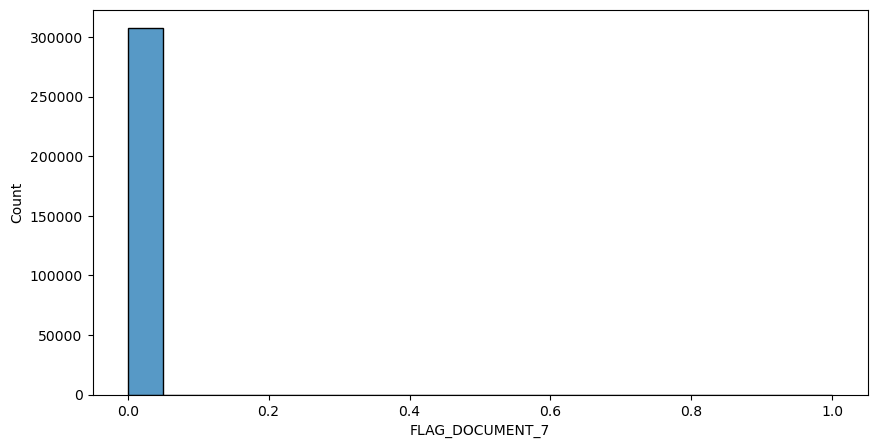

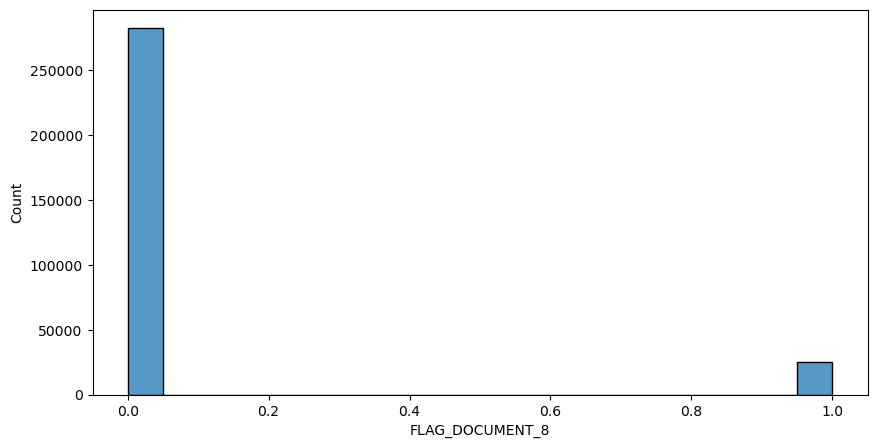

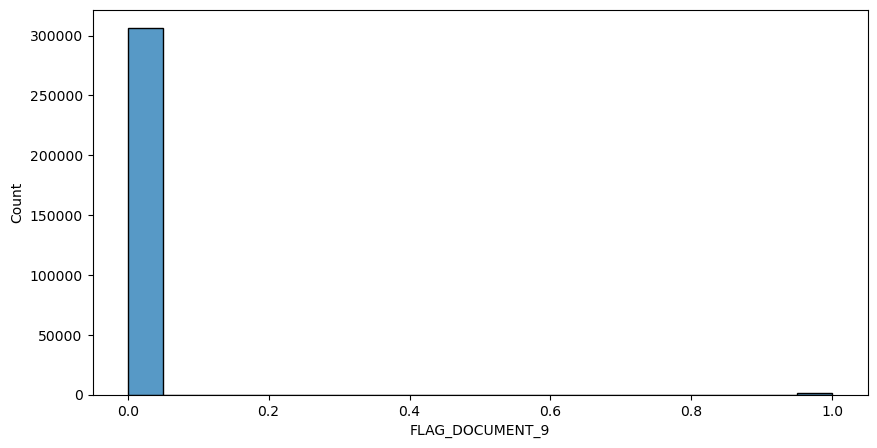

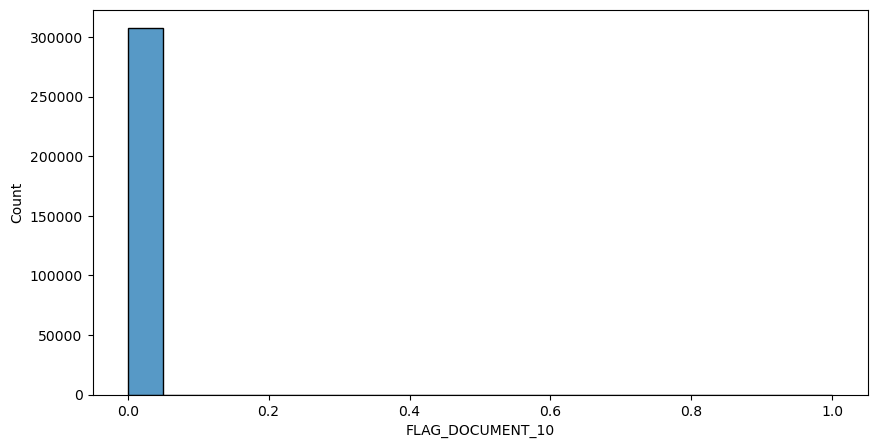

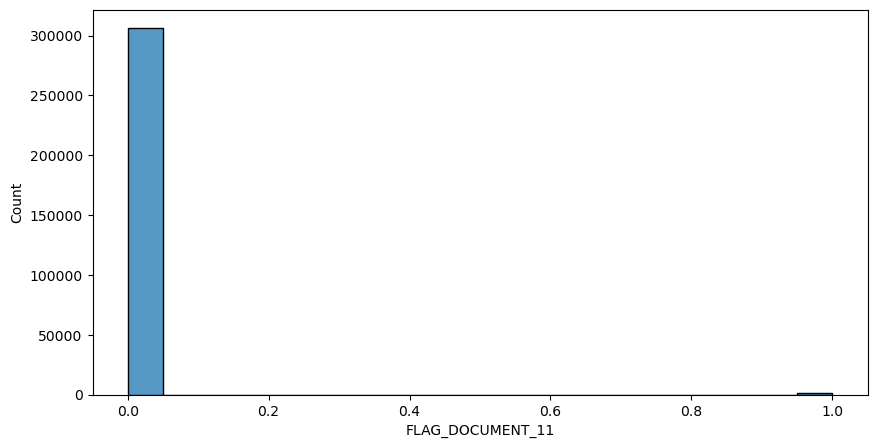

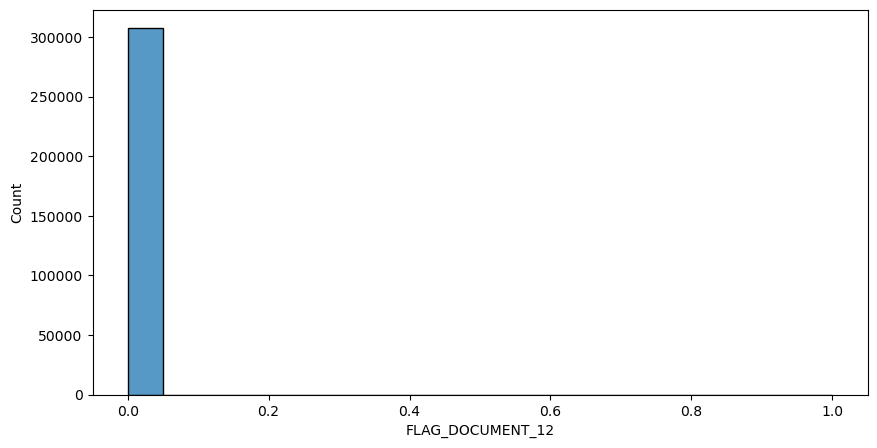

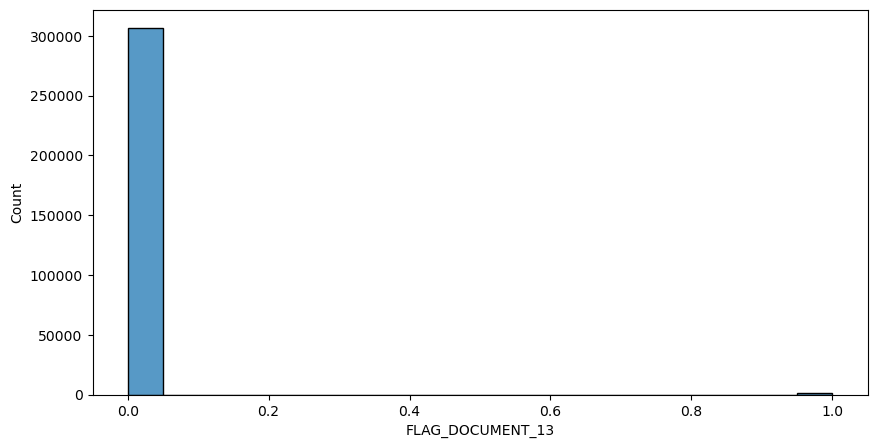

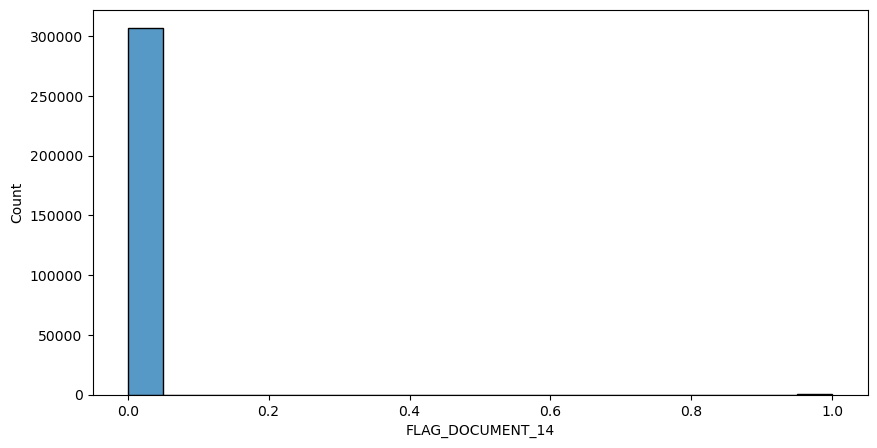

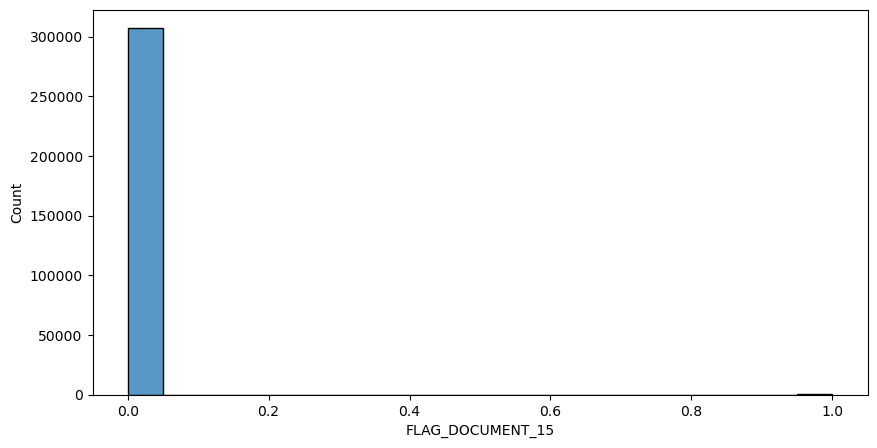

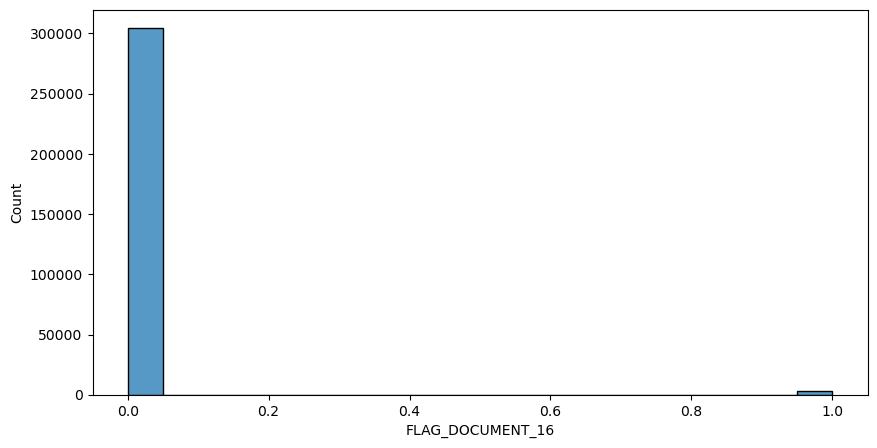

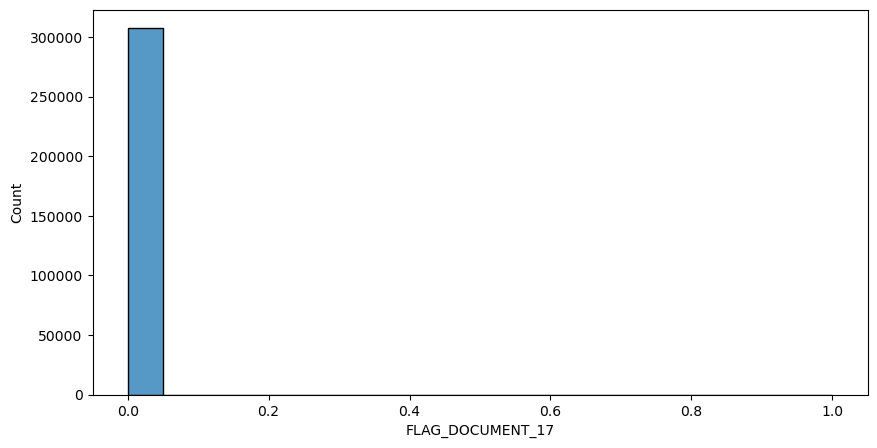

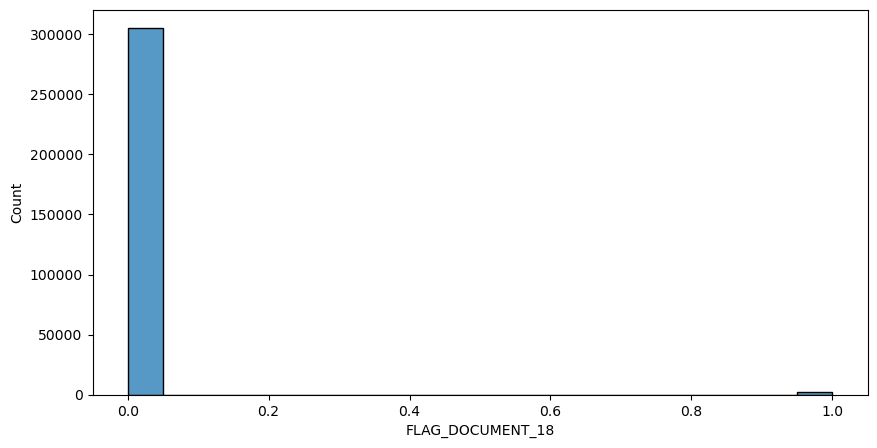

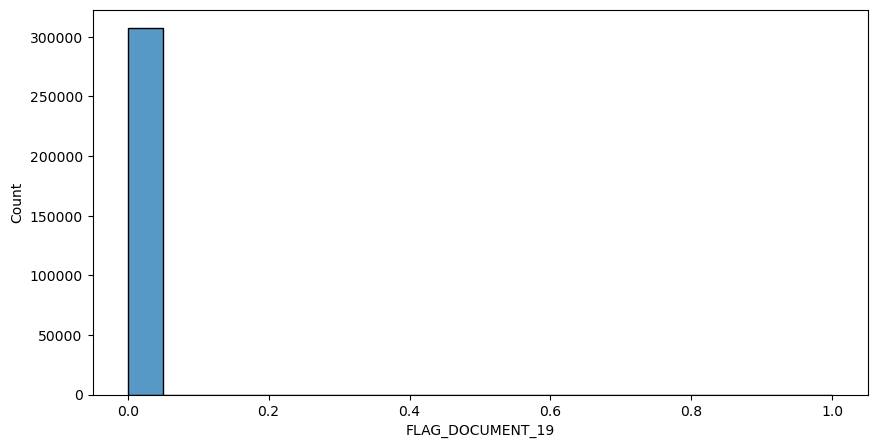

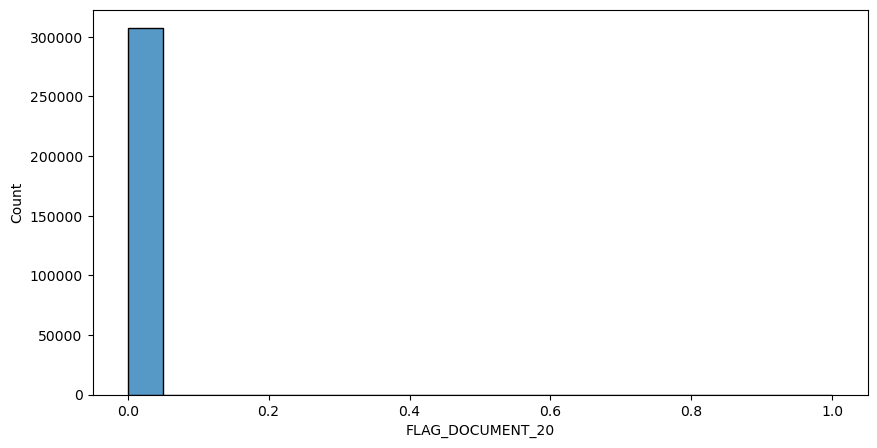

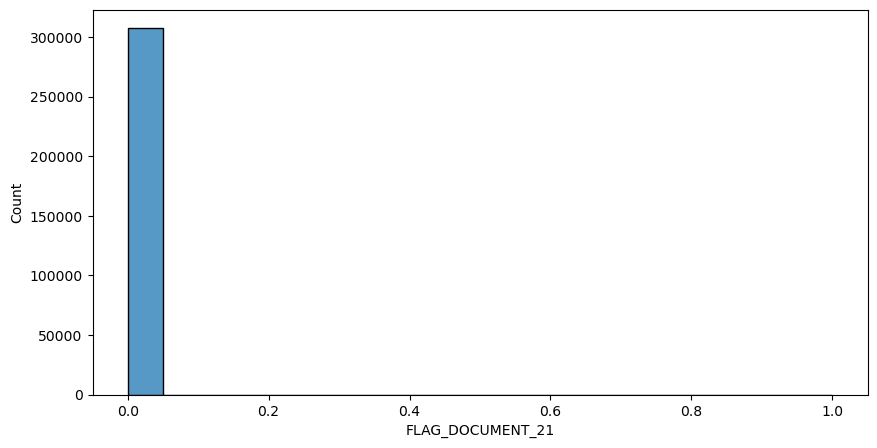

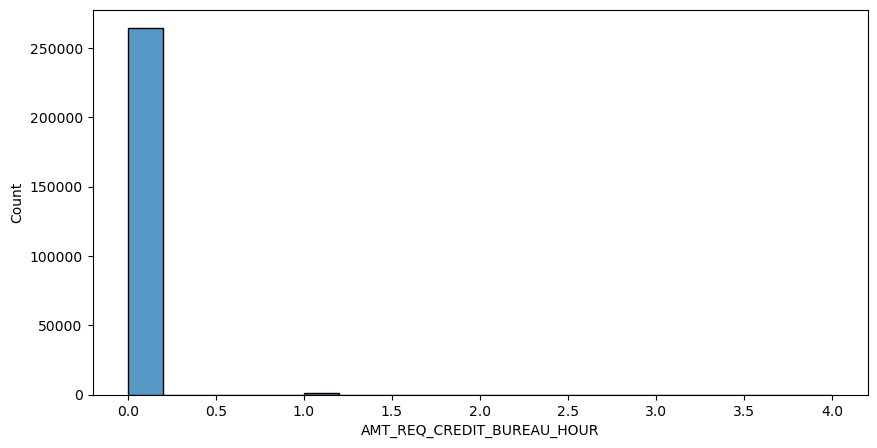

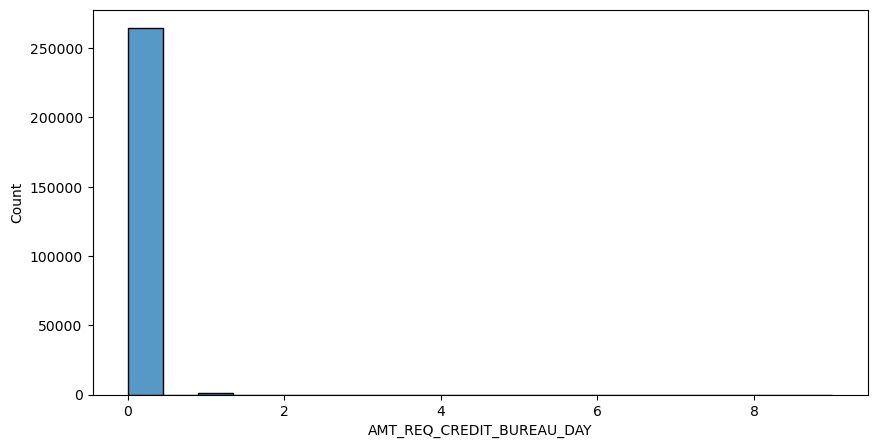

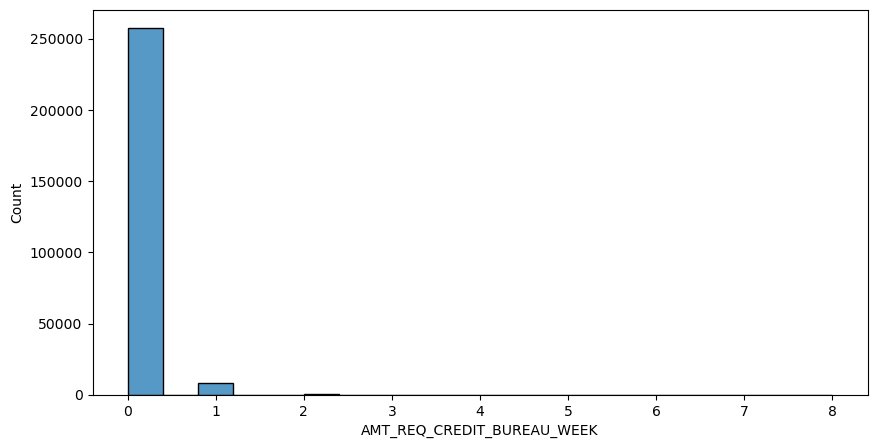

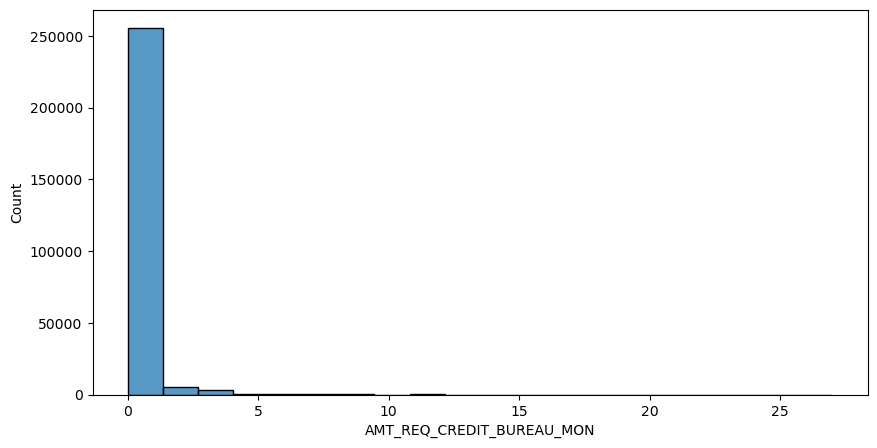

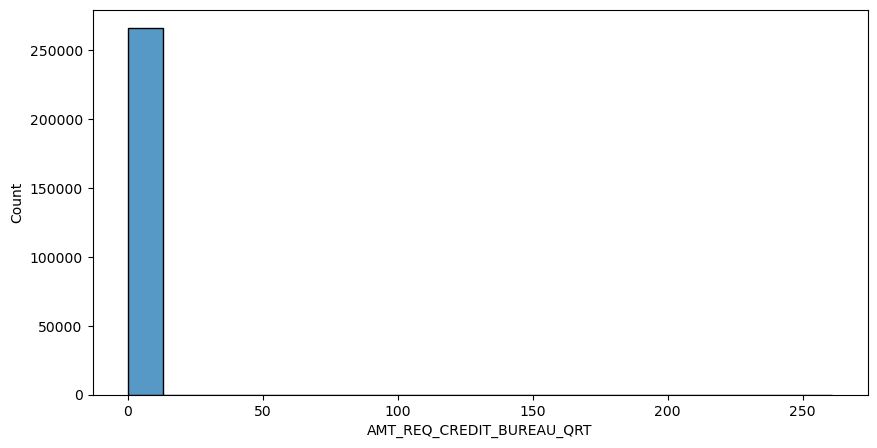

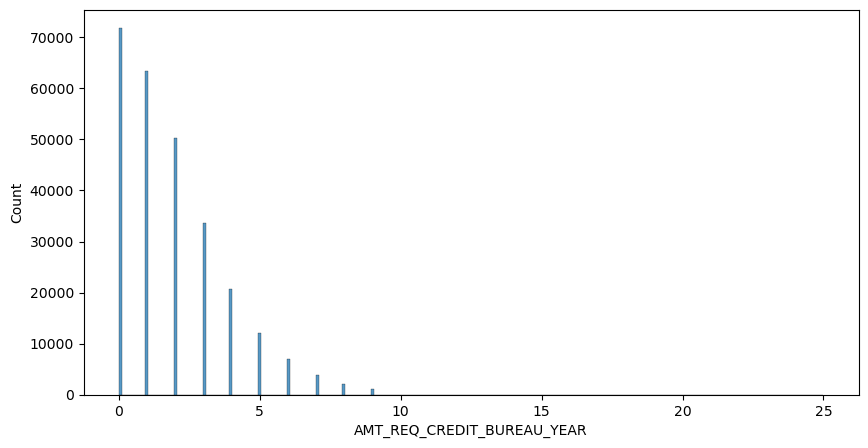

In [65]:
for columns in num_cols:
    plt.figure(figsize=(10,5))
    sns.histplot(x=num_cols[columns].dropna(),data=num_cols)
plt.show()

In [67]:
pre_data.SK_ID_PREV.value_counts().sort_values(ascending=False)

SK_ID_PREV
2030495    1
2273188    1
1784265    1
1383531    1
2315218    1
          ..
2785582    1
1755809    1
2381880    1
2406354    1
2418762    1
Name: count, Length: 1670214, dtype: int64

In [69]:
# duplicates from Previous application data as customer taken loan multiple times earlier
pre_data.SK_ID_CURR.value_counts().sort_values(ascending=False)

SK_ID_CURR
187868    77
265681    73
173680    72
242412    68
206783    67
          ..
216165     1
227530     1
302659     1
116679     1
191629     1
Name: count, Length: 338857, dtype: int64

In [71]:
# Merge 'train' DataFrame with 'previous_application' DataFrame based on 'SK_ID_CURR'
# Using 'inner' join to retain only common rows between the two DataFrames
custLoanMergedDF = newap_data.merge(pre_data, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

In [73]:
# Create a subset of the DataFrame 'custCreditInfoFilteredDF' containing records where the 'TARGET' column is equal to '0'
credInfo_0 = newap_data.loc[newap_data['TARGET'] == 0]

# Create a subset of the DataFrame 'train' containing records where the 'TARGET' column is equal to '1'
credInfo_1 = newap_data.loc[newap_data['TARGET'] == 1]

In [75]:
# Create a subset of the DataFrame 'custCreditInfoFilteredDF' containing records where the 'TARGET' column is equal to '0'
prevCredInfo_0 = custLoanMergedDF.loc[custLoanMergedDF['TARGET'] == 0]

# Create a subset of the DataFrame 'train' containing records where the 'TARGET' column is equal to '1'
prevCredInfo_1 = custLoanMergedDF.loc[custLoanMergedDF['TARGET'] == 1]

In [77]:
def BiVariateplots(column, hue):
    # Assign column and hue parameters to local variables
    col = column
    hue = hue

    # Create a figure for the plots with a specific size
    fig = plt.figure(figsize=(13,10))

    # Subplot 1: Pie chart showing the distribution of values in the column
    ax1 = plt.subplot(221)
    newap_data[col].value_counts().plot.pie(autopct="%1.0f%%", ax=ax1)
    plt.title('Distribution of values for the column: '+ col)

    # Subplot 2: Bar plot displaying the distribution of values by target categories
    ax2 = plt.subplot(222)
    df = pd.DataFrame()
    df['0'] = ((credInfo_0[col].value_counts()) / len(credInfo_0))
    df['1'] = ((credInfo_1[col].value_counts()) / len(credInfo_1))
    df.plot.bar(ax=ax2)
    plt.title('Distribution of values by target category')

    # Subplot 3: Count plot showing the distribution of values for Target=0
    ax3 = plt.subplot(223)
    sns.countplot(x=col, hue=hue, data=credInfo_0, ax=ax3)
    plt.xticks(rotation=90)
    plt.title('Distribution of values for Target=0')

    # Subplot 4: Count plot showing the distribution of values for Target=1
    ax4 = plt.subplot(224)
    sns.countplot(x=col, hue=hue, data=credInfo_1, ax=ax4)
    plt.xticks(rotation=90)
    plt.title('Distribution of values for Target=1')

    # Adjust layout to prevent overlap
    fig.tight_layout()

    # Display the plots
    plt.show()

## Bivariate Analysis

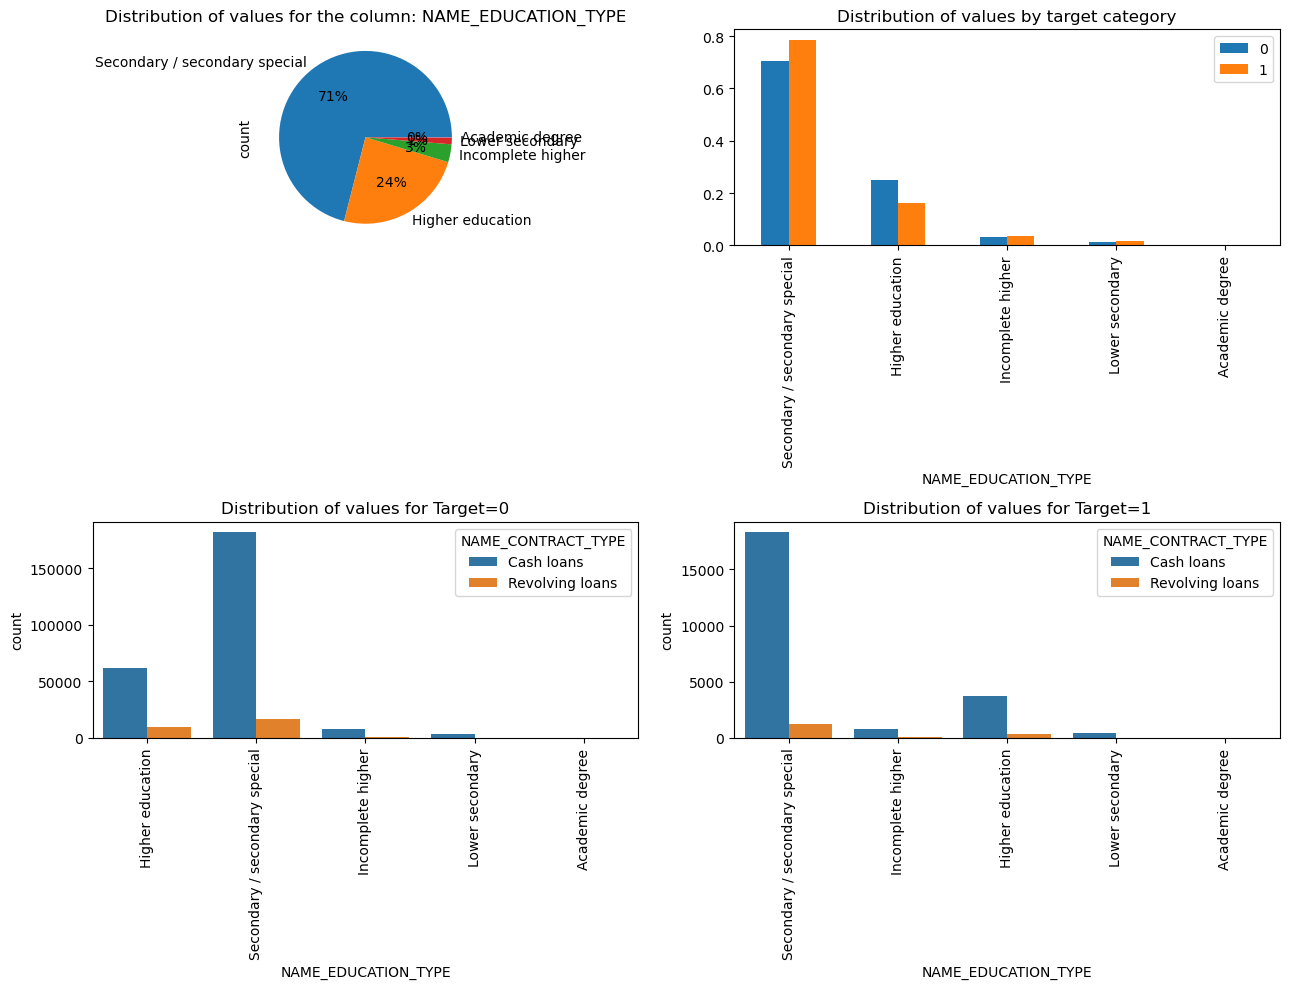

In [80]:
BiVariateplots('NAME_EDUCATION_TYPE','NAME_CONTRACT_TYPE')

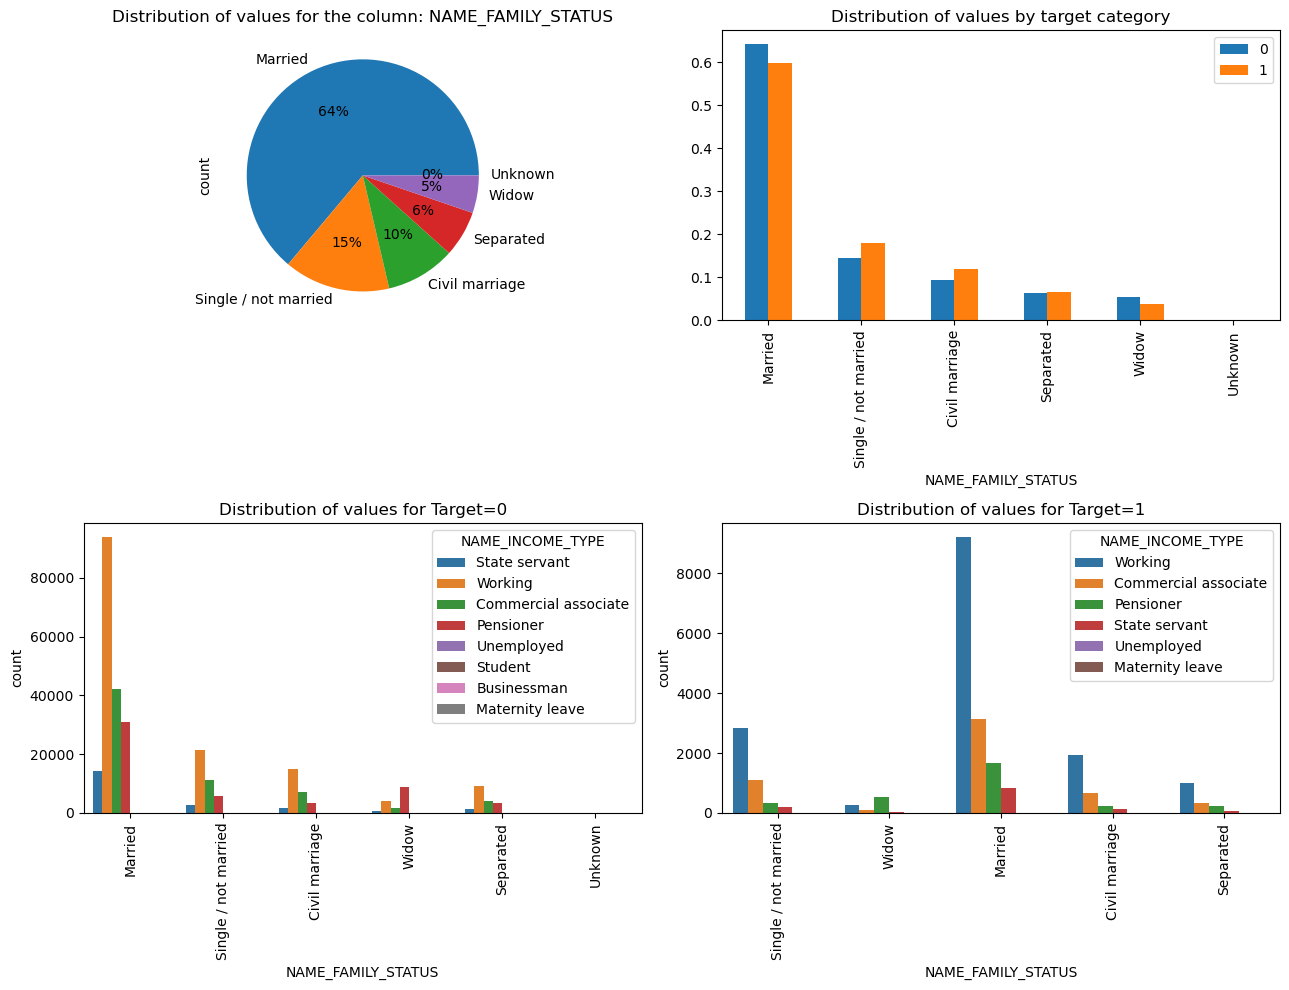

In [82]:
BiVariateplots('NAME_FAMILY_STATUS','NAME_INCOME_TYPE')

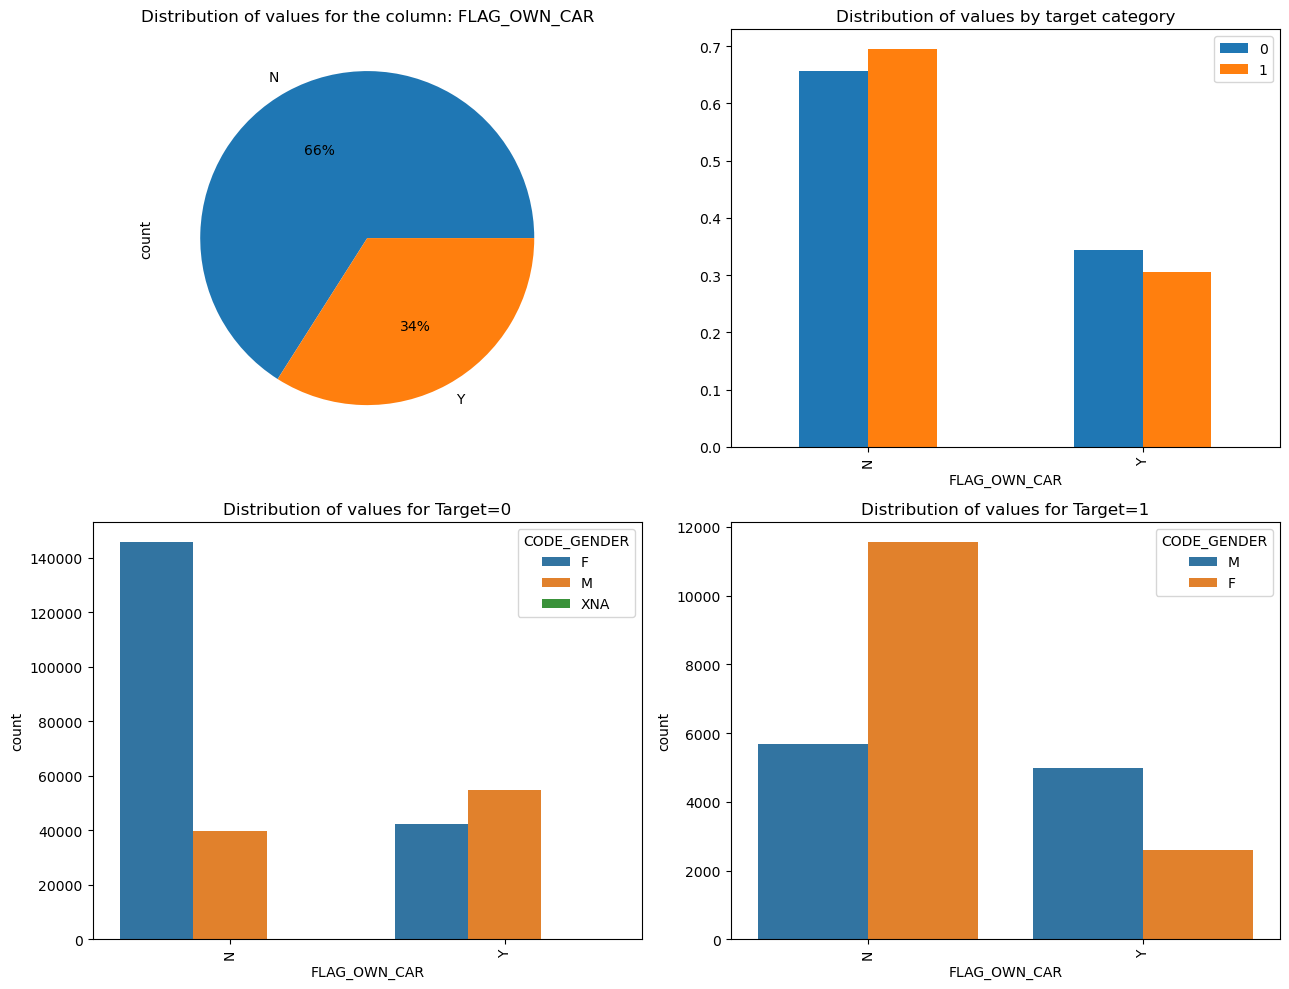

In [84]:
BiVariateplots('FLAG_OWN_CAR','CODE_GENDER')

# Conclusion
From the above analysis clients with secondary/ secondary special are taking higher number of cash loans and facing difficulties in repayment of loans.
Most of the loans are taken by clients with marital status as 'Married'and higher number of defaulters are from this category. Most of the clients with marital status as 'Married' are working professionals and there is a significant numbers who have done successful repayment of loans compared to defaulters.